# Exploratory Analysis

In [1]:
#same as when not random since this is model part not prediction part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date', 'Dollar', 'Crude', 'Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory','UAN']]
df_96on.tail()

,Date,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea_Inventory,Urea,UAN_Inventory,UAN
1057,4/8/2016,94.235,40.99,365.00,2.077,49.85,1000000,316641.6667,300000,248,998987.8733,209.92
1058,4/15/2016,94.696,41.71,382.00,1.997,50.85,1000000,316641.6667,300000,255,998987.8733,205.12
1059,4/22/2016,95.116,44.54,375.50,2.267,51.00,1000000,316641.6667,300000,238,998987.8733,205.12
1060,4/29/2016,93.082,46.69,391.75,2.322,50.75,1000000,316641.6667,300000,232,998987.8733,212.16
1061,4/30/2016,93.082,46.69,391.75,2.322,50.75,1000000,316641.6667,300000,232,998987.8733,212.16


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
My_Coal                   float64
Monthly Imports             int64
Urea_Prod                 float64
Urea_Inventory              int64
Urea                        int64
UAN_Inventory             float64
UAN                       float64
dtype: object

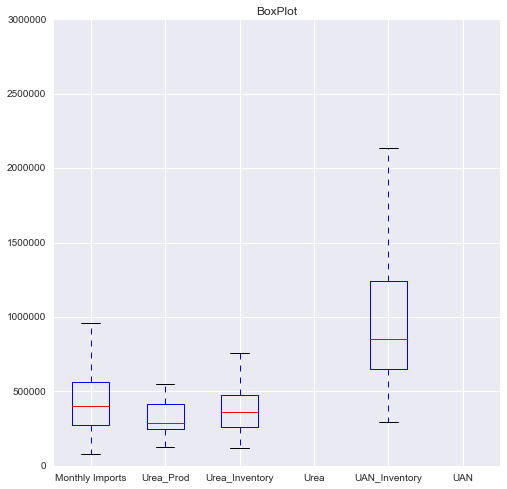

In [3]:
plt.show(df_96on[['Monthly Imports','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory','UAN']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

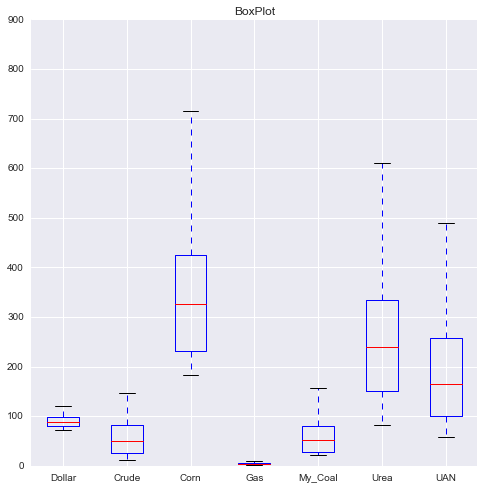

In [4]:
#no urea_prod and monthly imports urea_inventory since too big compared to others so not able to see them
plt.show(df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea','UAN']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

In [5]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea_Inventory,Urea,UAN_Inventory,UAN
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,90.673056,54.785461,361.748588,4.598145,58.269067,437717.487759,321111.410575,379240.621469,260.028249,1005441.983512,183.703955
std,11.704768,31.243572,156.648138,2.364433,33.567989,226058.674754,97500.498985,150650.515279,135.620177,490773.222051,96.550610
min,71.657000,11.260000,182.500000,1.661000,20.900000,76875.000000,129670.329700,117546.000000,83.000000,297701.149400,58.000000
25%,81.181750,26.417500,231.062500,2.762500,27.425593,273879.500000,246470.588200,259783.750000,151.250000,650601.513700,101.200000
50%,87.900000,49.170000,325.500000,4.025500,51.840000,399137.000000,287209.302300,359240.500000,240.000000,850475.860200,165.200000
75%,98.708250,81.967500,424.437500,5.824750,79.675000,562811.000000,418566.750000,478000.000000,335.000000,1245263.158000,257.680000
max,119.900000,145.860000,809.250000,14.431000,192.500000,1400000.000000,549000.000000,843000.000000,825.000000,2588392.857000,514.880000


In [6]:
df_96on.corr() 

,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea_Inventory,Urea,UAN_Inventory,UAN
Dollar,1.000000,-0.775038,-0.681901,-0.330457,-0.755347,-0.255140,0.558864,0.512081,-0.728465,0.526080,-0.699618
Crude,-0.775038,1.000000,0.777411,0.393632,0.894882,0.379346,-0.740514,-0.589771,0.870389,-0.583918,0.879090
Corn,-0.681901,0.777411,1.000000,-0.001415,0.835389,0.324131,-0.484917,-0.362287,0.799823,-0.371072,0.817191
Gas,-0.330457,0.393632,-0.001415,1.000000,0.285473,0.156109,-0.479290,-0.243438,0.324833,-0.481610,0.344626
My_Coal,-0.755347,0.894882,0.835389,0.285473,1.000000,0.328468,-0.644274,-0.454161,0.882454,-0.491347,0.896790
Monthly Imports,-0.255140,0.379346,0.324131,0.156109,0.328468,1.000000,-0.436865,-0.207568,0.402426,-0.216165,0.468589
Urea_Prod,0.558864,-0.740514,-0.484917,-0.479290,-0.644274,-0.436865,1.000000,0.630979,-0.644789,0.677104,-0.701339
Urea_Inventory,0.512081,-0.589771,-0.362287,-0.243438,-0.454161,-0.207568,0.630979,1.000000,-0.522455,0.714760,-0.483051
Urea,-0.728465,0.870389,0.799823,0.324833,0.882454,0.402426,-0.644789,-0.522455,1.000000,-0.532196,0.953766
UAN_Inventory,0.526080,-0.583918,-0.371072,-0.481610,-0.491347,-0.216165,0.677104,0.714760,-0.532196,1.000000,-0.529593


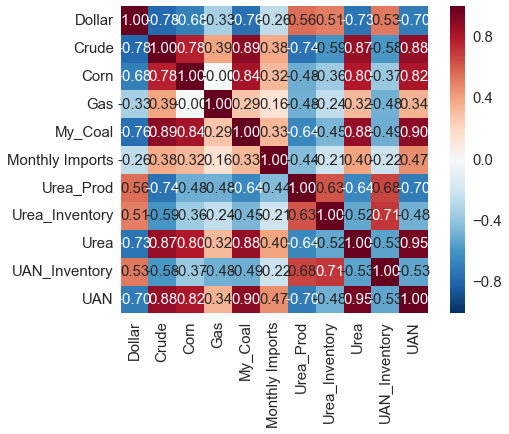

In [8]:
cols= ['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory','UAN']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#many of the x variables correlated to each other
#dollar to crude, corn, coal, urea_prod, urea_inventory, urea, uan_inventory
#crude to dollar, corn, coal, urea_prod, urea, uan_inventory
#corn to dollar, crude, coal, urea
#gas to nothing
#coal to dollar, crude, corn, urea_prod, urea
#monthly import to nothing
#urea_prod to dollar, crude, coal, urea, urea_inventory, uan_inventory
#urea_Inventory to dollar, crude,  urea_prod (nice since not correlated to coal), urea, uan_inventory
#urea to coal, crude, corn, dollar, urea_prod, urea_inventory, uan_inventory
#uan_inventory to dollar, crude, urea_prod, urea_inventory, urea
#uan to dollar, crude, corn, coal, urea_prod, urea, uan_inventory

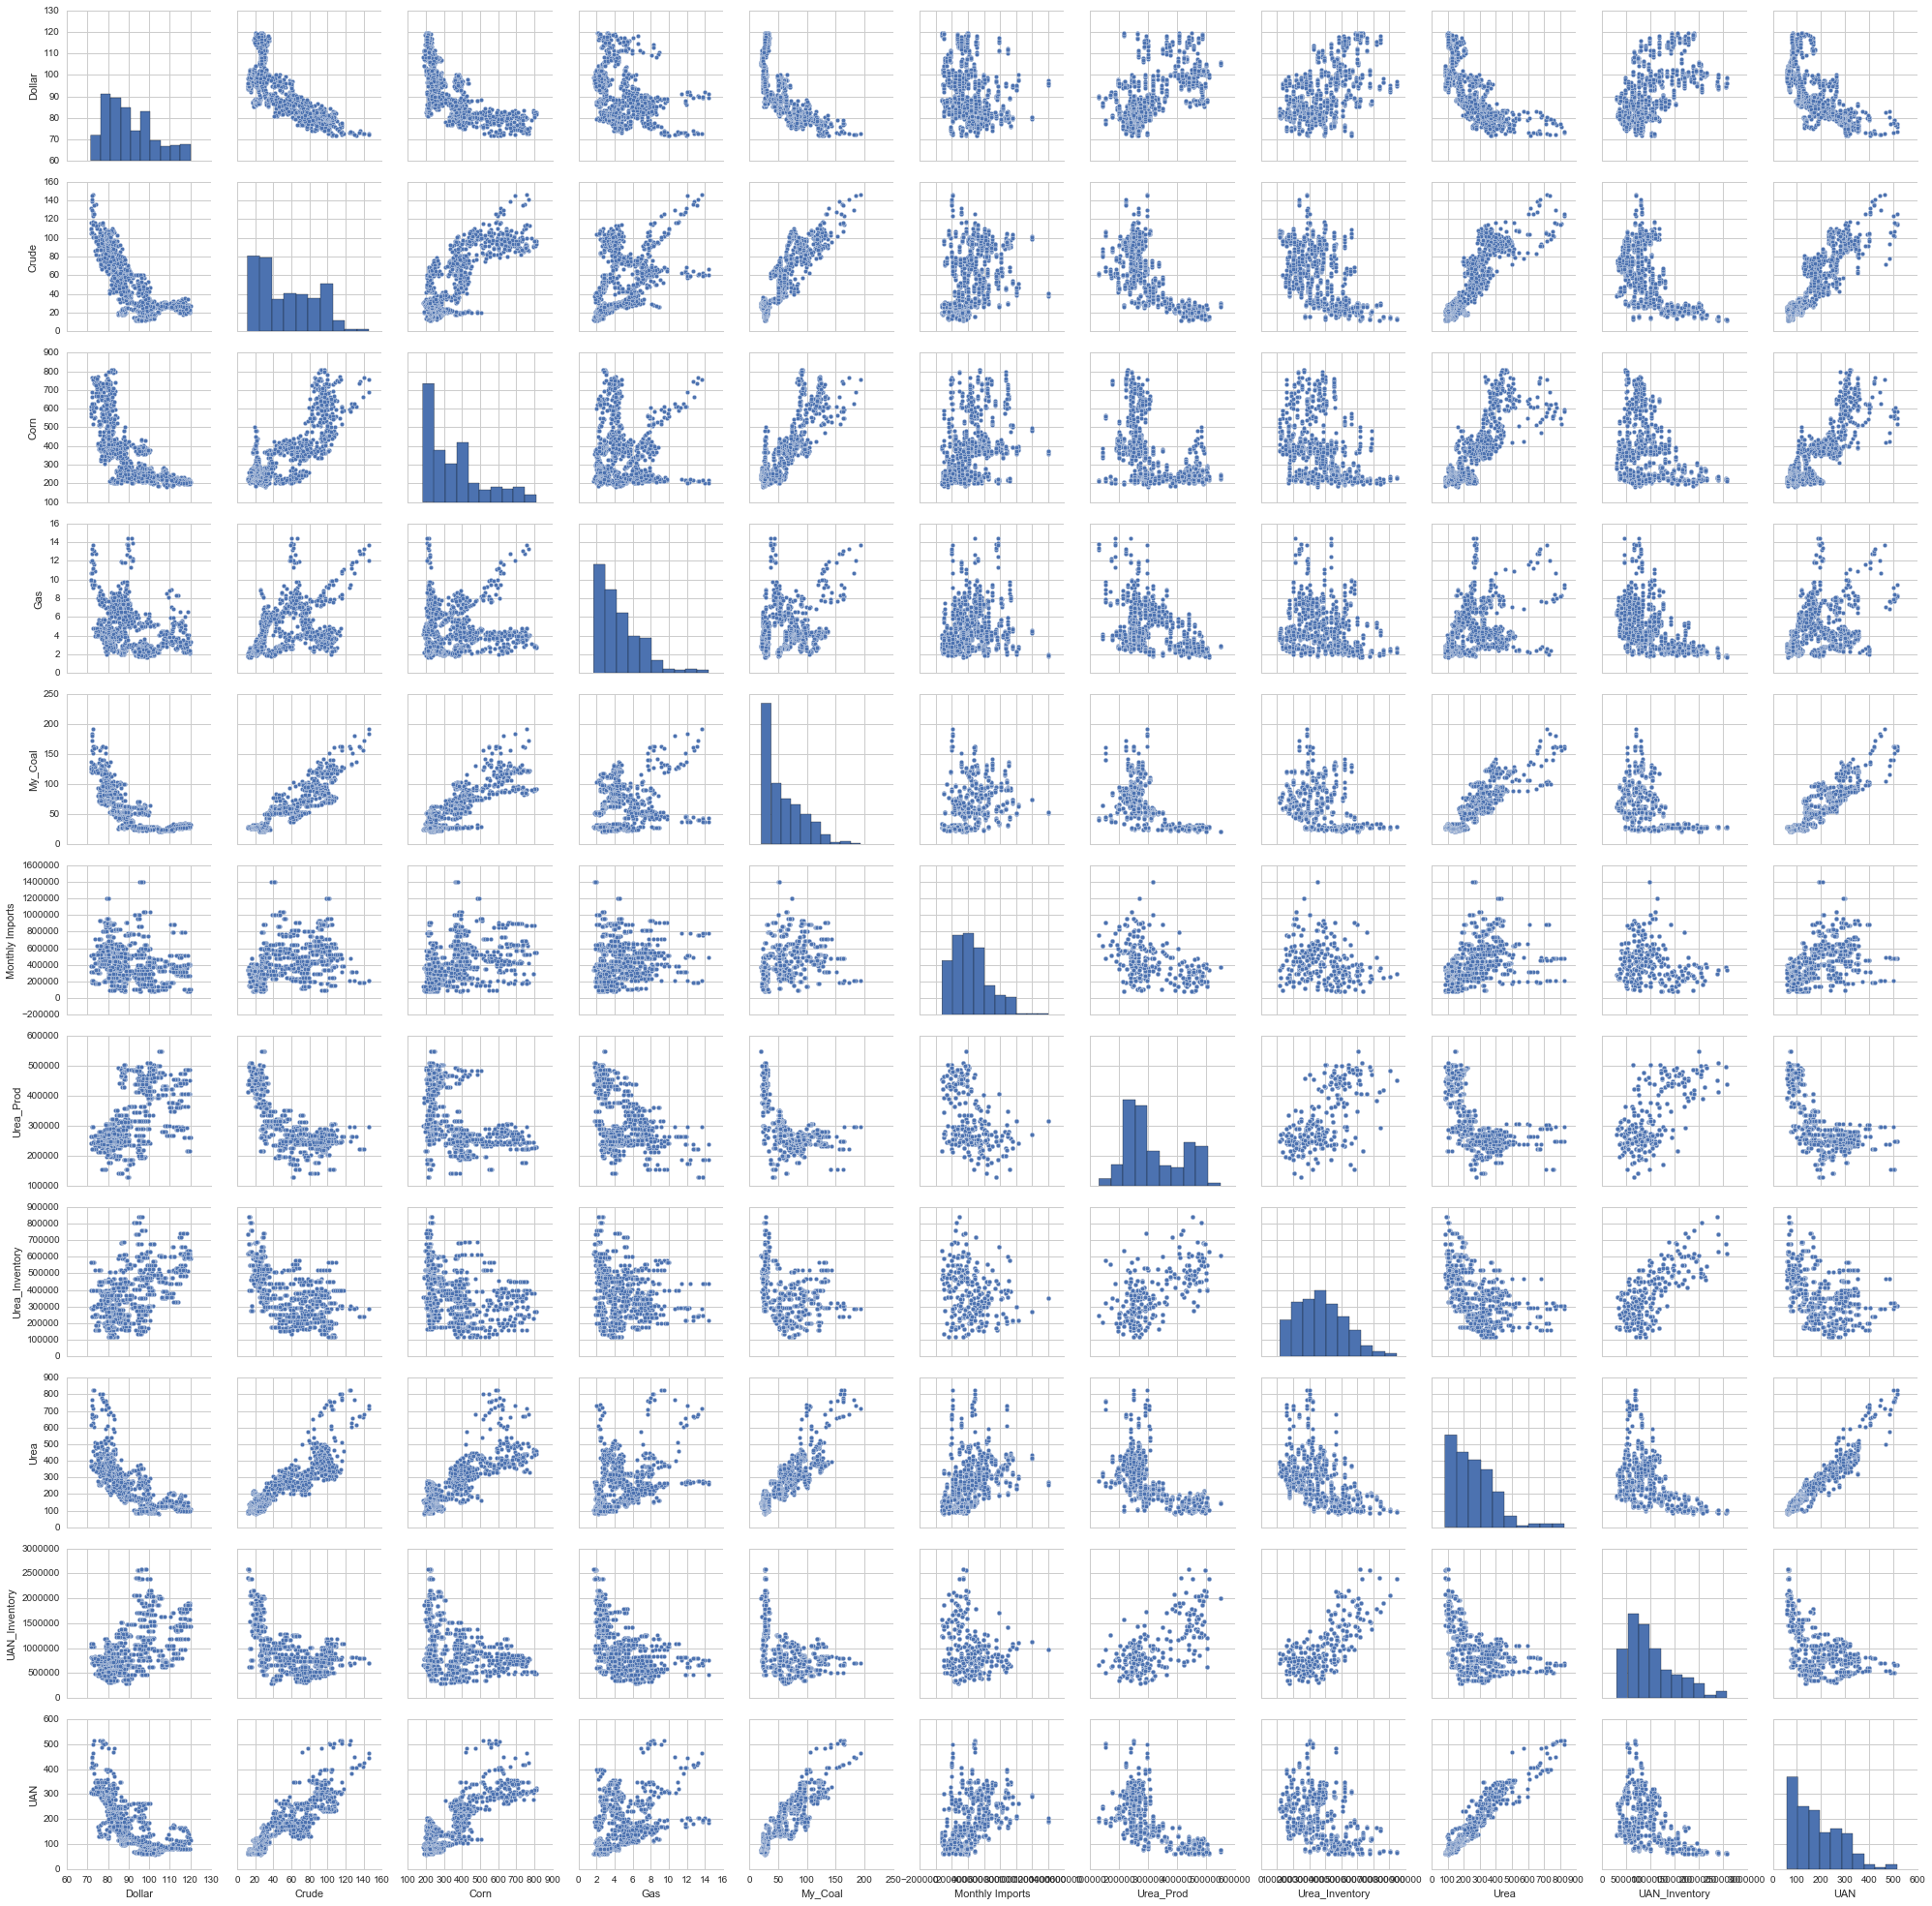

In [9]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()
#pretty much all variables are positively skewed, inventories look the most normally distributed

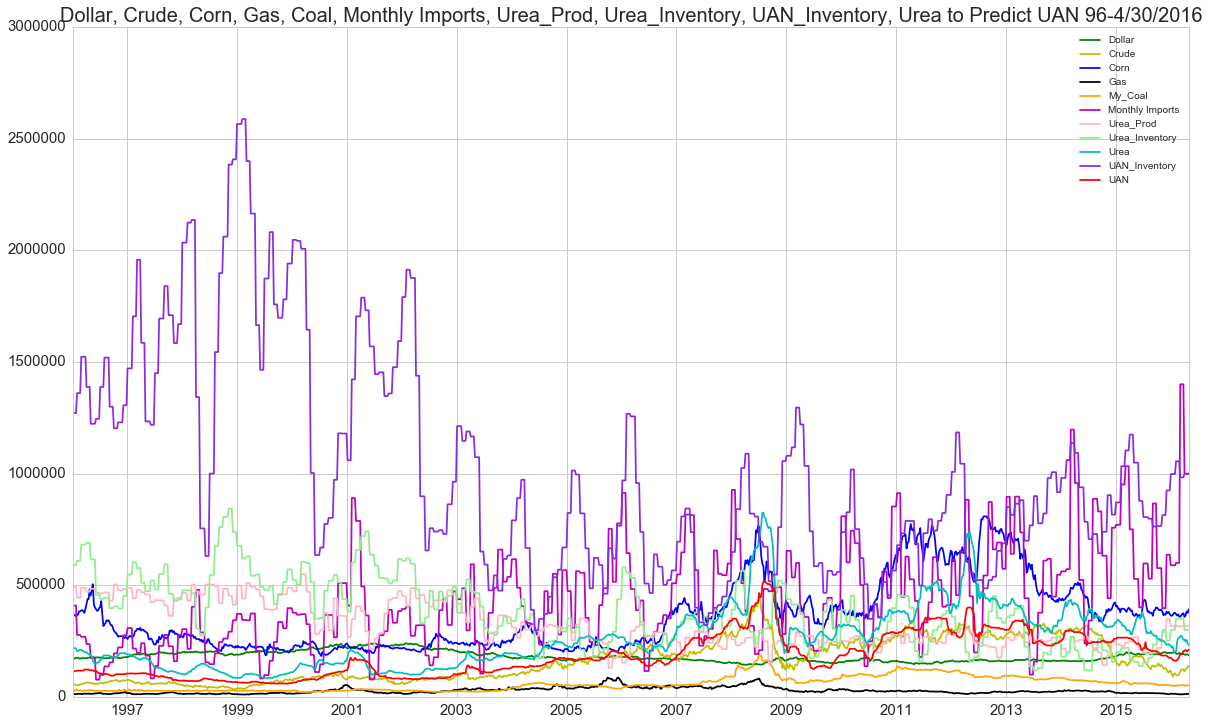

In [14]:
#trend, just modeify to look at the different variables and scaling
x = date
y1 = (df_96on['Dollar'])*2000
y2 = (df_96on['Crude'])*3000
y3 = (df_96on['Corn'])*1000
y4 = (df_96on['Gas'])*6000
y5 = (df_96on['My_Coal'])*1000
y6 = (df_96on['Monthly Imports'])
y7 = (df_96on['Urea_Prod'])
y8 = (df_96on['Urea_Inventory'])
y9 = (df_96on['Urea'])*1000
y10 = (df_96on['UAN_Inventory'])
y11 = (df_96on['UAN'])*1000

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'b')
ax.plot(x,y4,'k')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'m')
ax.plot(x,y7,'lightpink')
ax.plot(x,y8,'lightgreen')
ax.plot(x,y9,'c')
ax.plot(x,y10,'blueviolet')
ax.plot(x,y11,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Dollar, Crude, Corn, Gas, Coal, Monthly Imports, Urea_Prod, Urea_Inventory, UAN_Inventory, Urea to Predict UAN 96-4/30/2016', size=(20))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

## Look at different MLR's since different X variables are highly correlated to each other

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#crude and UAN_Inventory p-values too large so full model wouldn't work

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1861.
Date:                Wed, 25 May 2016   Prob (F-statistic):               0.00
Time:                        09:15:57   Log-Likelihood:                -4804.7
No. Observations:                1062   AIC:                             9631.
Df Residuals:                    1051   BIC:                             9686.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             -56.3266     12.635     -4.458      0.000       -81.119   -31.534
Dollar              0.6559      0.100      6.553      0.000         0.460     0.852
Crude               0.0670      0.066      1.014      0.311        -0.063     0.197
Corn                0.0957      0.010      9.237      0.000         0.075     0.116
Gas                 2.2883      0.440      5.206      0.000         1.426     3.151
My_Coal             0.4417      0.059      7.505      0.000         0.326     0.557
Monthly Imports  3.176e-05   3.55e-06      8.954      0.000      2.48e-05  3.87e-05
Urea_Prod          -0.0001   1.29e-05     -9.047      0.000        -0.000 -9.17e-05
Urea_Inventory   3.296e-05   7.73e-06      4.264      0.000      1.78e-05  4.81e-05
Urea                0.4520      0.013     35.702      0.000         0.427     0.477
UAN_Inventory   -2.836e-07    2.4e-06     -0.118      0.906     -4.99e-06  4.42e-06
==============================================================================
Omnibus:                      129.463   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.101
Skew:                           0.464   Prob(JB):                    8.97e-133
Kurtosis:                       6.589   Cond. No.                     2.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Forward selection

#### Step 1, 1 variable regressions to see which one has lowest AIC (not p-value since p-value may give high values 
#### to variables that have high correlation)
#### let's not use monthly imports because no future predictions (if used it 3rd most important urea, coal, monthly imports)

In [16]:
#dollar
X = df_96on[['Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12009.6693062
const     1.121263e-232
Dollar    6.271560e-157
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1016.
Date:                Tue, 24 May 2016   Prob (F-statistic):          6.27e-157
Time:                        08:55:44   Log-Likelihood:                -6002.8
No. Observations:                1062   AIC:                         1.201e+04
Df Residuals:                    1060   BIC:                         1.202e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        706.9806     16.551     42.716      0.000       674.505   739.456
Dollar        -5.7710      0.181    -31.879      0.000        -6.126    -5.416
==============================================================================
Omnibus:                       66.894   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.272
Skew:                           0.618   Prob(JB):                     6.11e-18
Kurtosis:                       3.515   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#crude
X = df_96on[['Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()


11149.8458674
const    3.086145e-32
Crude    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3605.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        08:55:51   Log-Likelihood:                -5572.9
No. Observations:                1062   AIC:                         1.115e+04
Df Residuals:                    1060   BIC:                         1.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.8731      2.853     12.223      0.000        29.275    40.471
Crude          2.7166      0.045     60.046      0.000         2.628     2.805
==============================================================================
Omnibus:                      152.593   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.015
Skew:                           0.754   Prob(JB):                     9.25e-90
Kurtosis:                       5.645   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#corn
X = df_96on[['Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

In [18]:
#coal
X = df_96on[['My_Coal']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10991.70922
const      1.505786e-34
My_Coal    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     4355.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        08:55:58   Log-Likelihood:                -5493.9
No. Observations:                1062   AIC:                         1.099e+04
Df Residuals:                    1060   BIC:                         1.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.4041      2.628     12.710      0.000        28.247    38.561
My_Coal        2.5794      0.039     65.989      0.000         2.503     2.656
==============================================================================
Omnibus:                        1.519   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.391
Skew:                           0.077   Prob(JB):                        0.499
Kurtosis:                       3.089   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#urea_prod
X = df_96on[['Urea_Prod']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12004.6415126
const        2.322919e-318
Urea_Prod    5.088586e-158
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1026.
Date:                Tue, 24 May 2016   Prob (F-statistic):          5.09e-158
Time:                        08:56:07   Log-Likelihood:                -6000.3
No. Observations:                1062   AIC:                         1.200e+04
Df Residuals:                    1060   BIC:                         1.201e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        406.7178      7.276     55.902      0.000       392.442   420.994
Urea_Prod     -0.0007   2.17e-05    -32.033      0.000        -0.001    -0.001
==============================================================================
Omnibus:                      164.184   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.369
Skew:                           0.934   Prob(JB):                     6.63e-68
Kurtosis:                       4.871   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#gas
X = df_96on[['Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12589.3761268
const    6.460966e-73
Gas      5.584734e-31
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 24 May 2016   Prob (F-statistic):           5.58e-31
Time:                        08:56:17   Log-Likelihood:                -6292.7
No. Observations:                1062   AIC:                         1.259e+04
Df Residuals:                    1060   BIC:                         1.260e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        118.9959      6.087     19.549      0.000       107.052   130.940
Gas           14.0726      1.177     11.952      0.000        11.762    16.383
==============================================================================
Omnibus:                       99.438   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.223
Skew:                           0.820   Prob(JB):                     1.75e-27
Kurtosis:                       2.692   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#urea_inventory
X = df_96on[['Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12441.4645017
const             2.402542e-233
Urea_Inventory     3.498586e-63
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     322.6
Date:                Tue, 24 May 2016   Prob (F-statistic):           3.50e-63
Time:                        08:56:37   Log-Likelihood:                -6218.7
No. Observations:                1062   AIC:                         1.244e+04
Df Residuals:                    1060   BIC:                         1.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            301.1105      7.033     42.814      0.000       287.310   314.911
Urea_Inventory    -0.0003   1.72e-05    -17.962      0.000        -0.000    -0.000
==============================================================================
Omnibus:                      164.721   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.852
Skew:                           1.069   Prob(JB):                     5.56e-55
Kurtosis:                       4.038   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#urea
X = df_96on[['Urea']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10170.2935048
const    0.000221
Urea     0.000000
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        08:57:07   Log-Likelihood:                -5083.1
No. Observations:                1062   AIC:                         1.017e+04
Df Residuals:                    1060   BIC:                         1.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.1436      1.927      3.707      0.000         3.362    10.925
Urea           0.6790      0.007    103.319      0.000         0.666     0.692
==============================================================================
Omnibus:                       68.247   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.262
Skew:                           0.171   Prob(JB):                     1.01e-55
Kurtosis:                       5.368   Cond. No.                         634.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#uan_inventory
X = df_96on[['UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12374.0847199
const            4.331493e-283
UAN_Inventory     7.951594e-78
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     413.2
Date:                Tue, 24 May 2016   Prob (F-statistic):           7.95e-78
Time:                        08:57:23   Log-Likelihood:                -6185.0
No. Observations:                1062   AIC:                         1.237e+04
Df Residuals:                    1060   BIC:                         1.238e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           288.4587      5.734     50.305      0.000       277.207   299.710
UAN_Inventory    -0.0001   5.13e-06    -20.327      0.000        -0.000 -9.41e-05
==============================================================================
Omnibus:                       81.950   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.217
Skew:                           0.705   Prob(JB):                     1.73e-22
Kurtosis:                       3.528   Cond. No.                     2.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 2 now using 2 variables (UAN had lowest AIC)

In [25]:
#urea and dollar
X = df_96on[['Urea','Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#aic worse

10171.7082768
const     0.178308
Urea      0.000000
Dollar    0.445022
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5336.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:10:37   Log-Likelihood:                -5082.9
No. Observations:                1062   AIC:                         1.017e+04
Df Residuals:                    1059   BIC:                         1.019e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         16.2338     12.053      1.347      0.178        -7.417    39.884
Urea           0.6737      0.010     70.212      0.000         0.655     0.692
Dollar        -0.0849      0.111     -0.764      0.445        -0.303     0.133
==============================================================================
Omnibus:                       66.725   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.711
Skew:                           0.179   Prob(JB):                     1.46e-52
Kurtosis:                       5.295   Cond. No.                     4.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#urea and coal
X = df_96on[['Urea','Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10049.2639467
const     2.679817e-03
Urea     5.467534e-241
Crude     1.684888e-28
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     6052.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:11:19   Log-Likelihood:                -5021.6
No. Observations:                1062   AIC:                         1.005e+04
Df Residuals:                    1059   BIC:                         1.006e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.4930      1.825      3.009      0.003         1.911     9.075
Urea           0.5539      0.013     43.952      0.000         0.529     0.579
Crude          0.6239      0.055     11.405      0.000         0.517     0.731
==============================================================================
Omnibus:                       96.036   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.887
Skew:                           0.372   Prob(JB):                     3.88e-77
Kurtosis:                       5.720   Cond. No.                         650.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#corn and urea
X = df_96on[['Urea','Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10071.2548728
const     5.266367e-02
Urea     9.881313e-324
Corn      1.067002e-23
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     5917.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:11:30   Log-Likelihood:                -5032.6
No. Observations:                1062   AIC:                         1.007e+04
Df Residuals:                    1059   BIC:                         1.009e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.1550      2.142     -1.940      0.053        -8.358     0.048
Urea           0.5931      0.010     56.783      0.000         0.573     0.614
Corn           0.0930      0.009     10.281      0.000         0.075     0.111
==============================================================================
Omnibus:                       78.014   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.848
Skew:                           0.255   Prob(JB):                     3.12e-63
Kurtosis:                       5.499   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#urea_prod and urea
X = df_96on[['Urea','Urea_Prod']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10010.4862303
const        8.067970e-40
Urea         0.000000e+00
Urea_Prod    5.957769e-37
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     6297.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:11:35   Log-Likelihood:                -5002.2
No. Observations:                1062   AIC:                         1.001e+04
Df Residuals:                    1059   BIC:                         1.003e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         71.7903      5.213     13.773      0.000        61.562    82.018
Urea           0.6112      0.008     76.671      0.000         0.596     0.627
Urea_Prod     -0.0001   1.11e-05    -13.202      0.000        -0.000    -0.000
==============================================================================
Omnibus:                       69.943   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.617
Skew:                           0.211   Prob(JB):                     1.03e-54
Kurtosis:                       5.332   Cond. No.                     2.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#gas and coal
X = df_96on[['Urea','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10156.2449845
const    0.339685
Urea     0.000000
Gas      0.000063
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     5422.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:11:41   Log-Likelihood:                -5075.1
No. Observations:                1062   AIC:                         1.016e+04
Df Residuals:                    1059   BIC:                         1.017e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.1765      2.279      0.955      0.340        -2.294     6.647
Urea           0.6700      0.007     97.106      0.000         0.656     0.684
Gas            1.5892      0.396      4.016      0.000         0.813     2.366
==============================================================================
Omnibus:                       64.224   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.888
Skew:                           0.261   Prob(JB):                     1.59e-41
Kurtosis:                       4.993   Cond. No.                         759.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#urea_inventory and urea
X = df_96on[['Urea','Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10168.5264196
const             0.99671
Urea              0.00000
Urea_Inventory    0.05266
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5353.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:12:01   Log-Likelihood:                -5081.3
No. Observations:                1062   AIC:                         1.017e+04
Df Residuals:                    1059   BIC:                         1.018e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.0171      4.147      0.004      0.997        -8.121     8.155
Urea               0.6868      0.008     89.225      0.000         0.672     0.702
Urea_Inventory  1.344e-05   6.93e-06      1.940      0.053     -1.55e-07   2.7e-05
==============================================================================
Omnibus:                       64.489   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.880
Skew:                           0.124   Prob(JB):                     4.94e-53
Kurtosis:                       5.320   Cond. No.                     1.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#coal and urea
X = df_96on[['Urea','My_Coal']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9997.08600048
const       6.370157e-04
Urea       4.946062e-218
My_Coal     7.206704e-40
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     6384.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:12:17   Log-Likelihood:                -4995.5
No. Observations:                1062   AIC:                             9997.
Df Residuals:                    1059   BIC:                         1.001e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.0875      1.777      3.426      0.001         2.601     9.574
Urea           0.5225      0.013     40.593      0.000         0.497     0.548
My_Coal        0.7167      0.052     13.782      0.000         0.615     0.819
==============================================================================
Omnibus:                       51.434   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.290
Skew:                           0.175   Prob(JB):                     2.82e-32
Kurtosis:                       4.778   Cond. No.                         651.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#uan_inventory and urea
X = df_96on[['Urea','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10164.3230239
const            0.000016
Urea             0.000000
UAN_Inventory    0.004824
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5377.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:12:24   Log-Likelihood:                -5079.2
No. Observations:                1062   AIC:                         1.016e+04
Df Residuals:                    1059   BIC:                         1.018e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            16.2397      3.750      4.331      0.000         8.882    23.598
Urea              0.6674      0.008     86.256      0.000         0.652     0.683
UAN_Inventory -6.039e-06   2.14e-06     -2.825      0.005     -1.02e-05 -1.84e-06
==============================================================================
Omnibus:                       67.539   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.445
Skew:                           0.202   Prob(JB):                     7.48e-52
Kurtosis:                       5.271   Cond. No.                     4.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3 (urea and coal)

In [35]:
#urea, coal, dollar
X = df_96on[['Urea','My_Coal','Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9980.81899897
const       2.110372e-04
Urea       1.992672e-220
My_Coal     1.121442e-43
Dollar      1.999664e-05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     4332.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:30:16   Log-Likelihood:                -4986.4
No. Observations:                1062   AIC:                             9981.
Df Residuals:                    1058   BIC:                         1.000e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -43.7321     11.761     -3.718      0.000       -66.810   -20.654
Urea           0.5337      0.013     40.951      0.000         0.508     0.559
My_Coal        0.7990      0.055     14.516      0.000         0.691     0.907
Dollar         0.4644      0.108      4.284      0.000         0.252     0.677
==============================================================================
Omnibus:                       51.170   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.183
Skew:                           0.145   Prob(JB):                     1.48e-33
Kurtosis:                       4.826   Cond. No.                     4.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#urea, coal, crude
X = df_96on[['Urea','My_Coal','Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9974.21849132
const       1.837819e-03
Urea       9.388332e-186
My_Coal     1.970761e-18
Crude       6.485819e-07
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     4361.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:30:24   Log-Likelihood:                -4983.1
No. Observations:                1062   AIC:                             9974.
Df Residuals:                    1058   BIC:                             9994.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.5002      1.761      3.123      0.002         2.045     8.956
Urea           0.4959      0.014     35.973      0.000         0.469     0.523
My_Coal        0.5483      0.061      8.922      0.000         0.428     0.669
Crude          0.3158      0.063      5.007      0.000         0.192     0.440
==============================================================================
Omnibus:                       70.541   Durbin-Watson:                   0.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.640
Skew:                           0.235   Prob(JB):                     3.38e-53
Kurtosis:                       5.289   Cond. No.                         665.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#urea, coal, corn
X = df_96on[['Urea','My_Coal','Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9975.09454417
const       8.224976e-01
Urea       2.699311e-204
My_Coal     4.759410e-23
Corn        1.020097e-06
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     4357.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:30:26   Log-Likelihood:                -4983.5
No. Observations:                1062   AIC:                             9975.
Df Residuals:                    1058   BIC:                             9995.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4704      2.097      0.224      0.822        -3.643     4.584
Urea           0.5068      0.013     38.622      0.000         0.481     0.533
My_Coal        0.5860      0.058     10.122      0.000         0.472     0.700
Corn           0.0478      0.010      4.917      0.000         0.029     0.067
==============================================================================
Omnibus:                       64.794   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.870
Skew:                           0.262   Prob(JB):                     3.57e-42
Kurtosis:                       5.010   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#urea, coal, gas
X = df_96on[['Urea','My_Coal','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9979.80922584
const       6.075115e-01
Urea       9.794198e-212
My_Coal     1.555242e-40
Gas         1.180154e-05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     4336.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:30:28   Log-Likelihood:                -4985.9
No. Observations:                1062   AIC:                             9980.
Df Residuals:                    1058   BIC:                         1.000e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0776      2.097      0.514      0.608        -3.038     5.193
Urea           0.5133      0.013     39.693      0.000         0.488     0.539
My_Coal        0.7173      0.052     13.913      0.000         0.616     0.818
Gas            1.6026      0.364      4.402      0.000         0.888     2.317
==============================================================================
Omnibus:                       53.305   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.500
Skew:                           0.206   Prob(JB):                     1.54e-32
Kurtosis:                       4.772   Cond. No.                         778.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#urea, coal, urea_inventory
X = df_96on[['Urea','My_Coal','Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9995.58552752
const              9.505290e-01
Urea              6.214096e-210
My_Coal            8.948307e-40
Urea_Inventory     6.190337e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     4267.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:30:37   Log-Likelihood:                -4993.8
No. Observations:                1062   AIC:                             9996.
Df Residuals:                    1058   BIC:                         1.002e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             -0.2371      3.821     -0.062      0.951        -7.735     7.261
Urea               0.5298      0.013     39.433      0.000         0.503     0.556
My_Coal            0.7150      0.052     13.764      0.000         0.613     0.817
Urea_Inventory  1.193e-05   6.39e-06      1.869      0.062     -5.95e-07  2.45e-05
==============================================================================
Omnibus:                       48.345   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.247
Skew:                           0.155   Prob(JB):                     7.06e-30
Kurtosis:                       4.714   Cond. No.                     1.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#urea, coal, urea_prod
X = df_96on[['Urea','My_Coal','Urea_Prod']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9879.12001868
const         2.478279e-30
Urea         6.696908e-211
My_Coal       9.990536e-31
Urea_Prod     8.312888e-28
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4802.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:30:40   Log-Likelihood:                -4935.6
No. Observations:                1062   AIC:                             9879.
Df Residuals:                    1058   BIC:                             9899.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         59.1878      5.011     11.812      0.000        49.356    69.020
Urea           0.4928      0.012     39.572      0.000         0.468     0.517
My_Coal        0.5983      0.050     11.898      0.000         0.500     0.697
Urea_Prod     -0.0001   1.07e-05    -11.248      0.000        -0.000 -9.89e-05
==============================================================================
Omnibus:                       67.183   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.790
Skew:                           0.086   Prob(JB):                     1.58e-59
Kurtosis:                       5.468   Cond. No.                     2.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#urea, coal, uan_inventory
X = df_96on[['Urea','My_Coal','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9993.73025676
const             1.914937e-04
Urea             2.126418e-206
My_Coal           2.899861e-39
UAN_Inventory     2.092472e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     4275.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:30:47   Log-Likelihood:                -4992.9
No. Observations:                1062   AIC:                             9994.
Df Residuals:                    1058   BIC:                         1.001e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            12.9775      3.467      3.743      0.000         6.175    19.780
Urea              0.5151      0.013     38.924      0.000         0.489     0.541
My_Coal           0.7101      0.052     13.664      0.000         0.608     0.812
UAN_Inventory -4.568e-06   1.98e-06     -2.313      0.021     -8.44e-06 -6.92e-07
==============================================================================
Omnibus:                       52.266   Durbin-Watson:                   0.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.108
Skew:                           0.177   Prob(JB):                     4.18e-33
Kurtosis:                       4.801   Cond. No.                     4.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 4 (urea, coal, urea_prod)

In [43]:
#urea, coal, urea_prod, dollar
X = df_96on[['Urea','My_Coal','Urea_Prod','Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9847.76472637
const         8.839739e-01
Urea         9.259711e-218
My_Coal       1.693974e-37
Urea_Prod     4.567786e-31
Dollar        8.389822e-09
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3722.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:41:54   Log-Likelihood:                -4918.9
No. Observations:                1062   AIC:                             9848.
Df Residuals:                    1057   BIC:                             9873.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.6913     11.587     -0.146      0.884       -24.427    21.044
Urea           0.5055      0.012     40.574      0.000         0.481     0.530
My_Coal        0.6972      0.052     13.313      0.000         0.594     0.800
Urea_Prod     -0.0001   1.06e-05    -11.972      0.000        -0.000    -0.000
Dollar         0.5943      0.102      5.807      0.000         0.393     0.795
==============================================================================
Omnibus:                       65.162   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.456
Skew:                           0.118   Prob(JB):                     1.84e-54
Kurtosis:                       5.353   Cond. No.                     5.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#urea, coal, urea_prod, crude
X = df_96on[['Urea','My_Coal','Urea_Prod','Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9881.034087
const         1.672499e-24
Urea         1.228095e-194
My_Coal       1.469370e-22
Urea_Prod     2.224590e-22
Crude         7.699953e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3599.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:42:00   Log-Likelihood:                -4935.5
No. Observations:                1062   AIC:                             9881.
Df Residuals:                    1057   BIC:                             9906.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         58.4704      5.581     10.477      0.000        47.519    69.422
Urea           0.4915      0.013     37.248      0.000         0.466     0.517
My_Coal        0.5893      0.059     10.001      0.000         0.474     0.705
Urea_Prod     -0.0001   1.19e-05     -9.955      0.000        -0.000  -9.5e-05
Crude          0.0197      0.067      0.292      0.770        -0.112     0.152
==============================================================================
Omnibus:                       67.922   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.258
Skew:                           0.088   Prob(JB):                     1.03e-60
Kurtosis:                       5.492   Cond. No.                     2.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#urea, coal, urea_prod, crude
X = df_96on[['Urea','My_Coal','Urea_Prod','Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9824.85649649
const         2.909579e-30
Urea         2.669263e-192
My_Coal       4.415058e-12
Urea_Prod     8.354609e-35
Corn          7.350074e-14
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     3809.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:45:58   Log-Likelihood:                -4907.4
No. Observations:                1062   AIC:                             9825.
Df Residuals:                    1057   BIC:                             9850.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         57.6450      4.886     11.797      0.000        48.057    67.233
Urea           0.4662      0.013     36.914      0.000         0.441     0.491
My_Coal        0.3923      0.056      7.004      0.000         0.282     0.502
Urea_Prod     -0.0001   1.06e-05    -12.764      0.000        -0.000    -0.000
Corn           0.0699      0.009      7.583      0.000         0.052     0.088
==============================================================================
Omnibus:                       92.305   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.928
Skew:                           0.213   Prob(JB):                     2.70e-99
Kurtosis:                       6.174   Cond. No.                     2.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#urea, coal, urea_prod, gas
X = df_96on[['Urea','My_Coal','Urea_Prod','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9881.00284559
const         6.681670e-22
Urea         1.625263e-209
My_Coal       1.262694e-30
Urea_Prod     1.319925e-23
Gas           7.327889e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3599.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:42:04   Log-Likelihood:                -4935.5
No. Observations:                1062   AIC:                             9881.
Df Residuals:                    1057   BIC:                             9906.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         58.1193      5.909      9.835      0.000        46.524    69.715
Urea           0.4924      0.013     39.382      0.000         0.468     0.517
My_Coal        0.5998      0.051     11.876      0.000         0.501     0.699
Urea_Prod     -0.0001   1.15e-05    -10.259      0.000        -0.000 -9.57e-05
Gas            0.1284      0.376      0.342      0.733        -0.609     0.866
==============================================================================
Omnibus:                       66.652   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.802
Skew:                           0.089   Prob(JB):                     1.91e-58
Kurtosis:                       5.444   Cond. No.                     2.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#urea, coal, urea_prod, uan_inventory
X = df_96on[['Urea','My_Coal','Urea_Prod','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9865.42517609
const             6.767554e-29
Urea             1.103296e-213
My_Coal           7.809629e-30
Urea_Prod         4.935248e-30
UAN_Inventory     7.769495e-05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     3656.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:42:10   Log-Likelihood:                -4927.7
No. Observations:                1062   AIC:                             9865.
Df Residuals:                    1057   BIC:                             9890.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            57.4266      4.996     11.494      0.000        47.623    67.230
Urea              0.5004      0.013     39.984      0.000         0.476     0.525
My_Coal           0.5856      0.050     11.703      0.000         0.487     0.684
Urea_Prod        -0.0001   1.24e-05    -11.747      0.000        -0.000    -0.000
UAN_Inventory  8.612e-06   2.17e-06      3.967      0.000      4.35e-06  1.29e-05
==============================================================================
Omnibus:                       69.566   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.989
Skew:                           0.124   Prob(JB):                     1.59e-61
Kurtosis:                       5.503   Cond. No.                     7.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#urea, coal, urea_prod, urea_inventory
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9812.39842638
const              1.114805e-22
Urea              1.597417e-225
My_Coal            3.452772e-27
Urea_Prod          5.781568e-42
Urea_Inventory     1.358078e-16
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3857.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:42:24   Log-Likelihood:                -4901.2
No. Observations:                1062   AIC:                             9812.
Df Residuals:                    1057   BIC:                             9837.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             49.9230      4.977     10.030      0.000        40.157    59.689
Urea               0.5154      0.012     41.704      0.000         0.491     0.540
My_Coal            0.5455      0.049     11.107      0.000         0.449     0.642
Urea_Prod         -0.0002   1.17e-05    -14.190      0.000        -0.000    -0.000
Urea_Inventory   5.56e-05   6.61e-06      8.406      0.000      4.26e-05  6.86e-05
==============================================================================
Omnibus:                       63.258   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.248
Skew:                           0.042   Prob(JB):                     2.05e-54
Kurtosis:                       5.362   Cond. No.                     3.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5 (urea, coal, urea_prod, urea_inventory)

In [50]:
#urea, coal, urea_prod, urea_inventory, dollar
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9797.15863545
const              5.198319e-01
Urea              6.558106e-229
My_Coal            6.511960e-31
Urea_Prod          2.639296e-42
Urea_Inventory     4.802173e-13
Dollar             3.482786e-05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     3136.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:48:48   Log-Likelihood:                -4892.6
No. Observations:                1062   AIC:                             9797.
Df Residuals:                    1056   BIC:                             9827.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              7.3237     11.375      0.644      0.520       -14.997    29.645
Urea               0.5220      0.012     42.211      0.000         0.498     0.546
My_Coal            0.6224      0.052     11.939      0.000         0.520     0.725
Urea_Prod         -0.0002   1.16e-05    -14.256      0.000        -0.000    -0.000
Urea_Inventory  4.933e-05   6.74e-06      7.323      0.000      3.61e-05  6.25e-05
Dollar             0.4261      0.102      4.157      0.000         0.225     0.627
==============================================================================
Omnibus:                       61.576   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.804
Skew:                           0.079   Prob(JB):                     1.26e-50
Kurtosis:                       5.273   Cond. No.                     7.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#urea, coal, urea_prod, urea_inventory, crude
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#R^2 didn't change

9808.68105733
const              3.649389e-14
Urea              1.831252e-209
My_Coal            3.110557e-15
Urea_Prod          1.251291e-34
Urea_Inventory     8.225284e-18
Crude              1.713613e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3100.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:48:52   Log-Likelihood:                -4898.3
No. Observations:                1062   AIC:                             9809.
Df Residuals:                    1056   BIC:                             9838.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             43.4486      5.658      7.679      0.000        32.346    54.551
Urea               0.5067      0.013     39.384      0.000         0.481     0.532
My_Coal            0.4689      0.059      8.006      0.000         0.354     0.584
Urea_Prod         -0.0002   1.23e-05    -12.728      0.000        -0.000    -0.000
Urea_Inventory  5.948e-05    6.8e-06      8.751      0.000      4.61e-05  7.28e-05
Crude              0.1598      0.067      2.388      0.017         0.028     0.291
==============================================================================
Omnibus:                       67.984   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.492
Skew:                           0.041   Prob(JB):                     1.67e-62
Kurtosis:                       5.534   Cond. No.                     3.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#urea, coal, urea_prod, urea_inventory, corn
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','Corn']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

9758.21523734
const              1.112931e-22
Urea              5.972110e-207
My_Coal            2.746134e-10
Urea_Prod          2.812618e-49
Urea_Inventory     1.461371e-16
Corn               7.863796e-14
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3261.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:48:58   Log-Likelihood:                -4873.1
No. Observations:                1062   AIC:                             9758.
Df Residuals:                    1056   BIC:                             9788.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             48.6729      4.852     10.031      0.000        39.152    58.194
Urea               0.4891      0.013     39.022      0.000         0.465     0.514
My_Coal            0.3475      0.055      6.374      0.000         0.241     0.454
Urea_Prod         -0.0002   1.15e-05    -15.554      0.000        -0.000    -0.000
Urea_Inventory  5.414e-05   6.45e-06      8.397      0.000      4.15e-05  6.68e-05
Corn               0.0677      0.009      7.574      0.000         0.050     0.085
==============================================================================
Omnibus:                       76.628   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              346.975
Skew:                           0.107   Prob(JB):                     4.52e-76
Kurtosis:                       5.792   Cond. No.                     3.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#urea, coal, urea_prod, urea_inventory, gas
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#worse

9814.10664918
const              2.108045e-18
Urea              4.082376e-224
My_Coal            1.113640e-26
Urea_Prod          2.047777e-37
Urea_Inventory     1.285160e-16
Gas                5.902260e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3083.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:49:03   Log-Likelihood:                -4901.1
No. Observations:                1062   AIC:                             9814.
Df Residuals:                    1056   BIC:                             9844.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             51.5015      5.777      8.915      0.000        40.165    62.838
Urea               0.5162      0.012     41.510      0.000         0.492     0.541
My_Coal            0.5427      0.049     10.990      0.000         0.446     0.640
Urea_Prod         -0.0002   1.26e-05    -13.297      0.000        -0.000    -0.000
Urea_Inventory  5.598e-05   6.65e-06      8.413      0.000      4.29e-05   6.9e-05
Gas               -0.1972      0.366     -0.539      0.590        -0.916     0.521
==============================================================================
Omnibus:                       63.812   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.268
Skew:                           0.032   Prob(JB):                     1.66e-55
Kurtosis:                       5.387   Cond. No.                     4.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#urea, coal, urea_prod, urea_inventory, uan_inventory
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#worse

9814.39841797
const              1.195258e-22
Urea              6.381780e-225
My_Coal            3.651343e-27
Urea_Prod          8.514660e-38
Urea_Inventory     3.881331e-13
UAN_Inventory      9.976941e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3082.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:49:08   Log-Likelihood:                -4901.2
No. Observations:                1062   AIC:                             9814.
Df Residuals:                    1056   BIC:                             9844.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             49.9233      4.981     10.023      0.000        40.150    59.697
Urea               0.5155      0.012     41.627      0.000         0.491     0.540
My_Coal            0.5455      0.049     11.102      0.000         0.449     0.642
Urea_Prod         -0.0002   1.24e-05    -13.373      0.000        -0.000    -0.000
Urea_Inventory  5.559e-05   7.56e-06      7.353      0.000      4.08e-05  7.04e-05
UAN_Inventory   6.996e-09   2.42e-06      0.003      0.998     -4.74e-06  4.76e-06
==============================================================================
Omnibus:                       63.258   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.245
Skew:                           0.042   Prob(JB):                     2.05e-54
Kurtosis:                       5.362   Cond. No.                     8.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 6 (urea, coal, urea_prod, urea_inventory, corn)

In [55]:
#urea, coal, urea_prod, urea_inventory, corn, dollar
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','Corn','Dollar']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#constant p value too large

9731.95712792
const              6.613022e-01
Urea              1.446847e-212
My_Coal            5.114457e-14
Urea_Prod          1.111861e-50
Urea_Inventory     3.140621e-12
Corn               3.118196e-16
Dollar             1.176982e-07
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2793.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:54:52   Log-Likelihood:                -4859.0
No. Observations:                1062   AIC:                             9732.
Df Residuals:                    1055   BIC:                             9767.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             -4.8749     11.124     -0.438      0.661       -26.702    16.952
Urea               0.4950      0.012     39.842      0.000         0.471     0.519
My_Coal            0.4259      0.056      7.633      0.000         0.316     0.535
Urea_Prod         -0.0002   1.13e-05    -15.808      0.000        -0.000    -0.000
Urea_Inventory  4.614e-05   6.54e-06      7.054      0.000      3.33e-05   5.9e-05
Corn               0.0739      0.009      8.302      0.000         0.056     0.091
Dollar             0.5344      0.100      5.334      0.000         0.338     0.731
==============================================================================
Omnibus:                       79.162   Durbin-Watson:                   0.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.122
Skew:                           0.172   Prob(JB):                     1.88e-75
Kurtosis:                       5.767   Cond. No.                     8.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#urea, coal, urea_prod, urea_inventory, corn, crude
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','Corn','Crude']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#crude p value too large

9758.28371162
const              1.091476e-15
Urea              1.233860e-196
My_Coal            5.330922e-07
Urea_Prod          5.596347e-42
Urea_Inventory     7.289669e-17
Corn               5.473113e-13
Crude              1.660900e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2720.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:54:57   Log-Likelihood:                -4872.1
No. Observations:                1062   AIC:                             9758.
Df Residuals:                    1055   BIC:                             9793.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             45.0000      5.527      8.142      0.000        34.155    55.845
Urea               0.4848      0.013     37.550      0.000         0.459     0.510
My_Coal            0.3089      0.061      5.045      0.000         0.189     0.429
Urea_Prod         -0.0002   1.22e-05    -14.194      0.000        -0.000    -0.000
Urea_Inventory   5.64e-05   6.65e-06      8.484      0.000      4.34e-05  6.94e-05
Corn               0.0659      0.009      7.305      0.000         0.048     0.084
Crude              0.0915      0.066      1.386      0.166        -0.038     0.221
==============================================================================
Omnibus:                       80.615   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.554
Skew:                           0.114   Prob(JB):                     5.16e-84
Kurtosis:                       5.935   Cond. No.                     3.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#urea, coal, urea_prod, urea_inventory, corn, gas
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','Corn','Gas']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#R^2 only increased to 0.940

9746.42028327
const              1.061866e-09
Urea              1.155204e-191
My_Coal            1.561172e-08
Urea_Prod          3.595074e-37
Urea_Inventory     9.903268e-15
Corn               8.922022e-17
Gas                2.147355e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2753.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:55:03   Log-Likelihood:                -4866.2
No. Observations:                1062   AIC:                             9746.
Df Residuals:                    1055   BIC:                             9781.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             36.1884      5.879      6.155      0.000        24.652    47.724
Urea               0.4763      0.013     36.839      0.000         0.451     0.502
My_Coal            0.3133      0.055      5.699      0.000         0.205     0.421
Urea_Prod         -0.0002   1.23e-05    -13.248      0.000        -0.000    -0.000
Urea_Inventory  5.082e-05   6.47e-06      7.854      0.000      3.81e-05  6.35e-05
Corn               0.0865      0.010      8.459      0.000         0.066     0.107
Gas                1.5163      0.408      3.714      0.000         0.715     2.317
==============================================================================
Omnibus:                       80.402   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.531
Skew:                           0.195   Prob(JB):                     2.53e-75
Kurtosis:                       5.759   Cond. No.                     4.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#urea, coal, urea_prod, urea_inventory, corn, uan_inventory
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory','Corn','UAN_Inventory']]
Y = df_96on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()
#UAN_Inventory p value too large

9760.04630373
const              1.307332e-22
Urea              5.180227e-206
My_Coal            3.007618e-10
Urea_Prod          5.177785e-44
Urea_Inventory     9.526319e-14
Corn               7.417642e-14
UAN_Inventory      6.821277e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2716.
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        09:55:10   Log-Likelihood:                -4873.0
No. Observations:                1062   AIC:                             9760.
Df Residuals:                    1055   BIC:                             9795.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             48.6236      4.856     10.014      0.000        39.096    58.152
Urea               0.4888      0.013     38.897      0.000         0.464     0.513
My_Coal            0.3470      0.055      6.360      0.000         0.240     0.454
Urea_Prod         -0.0002   1.22e-05    -14.582      0.000        -0.000    -0.000
Urea_Inventory   5.56e-05   7.37e-06      7.548      0.000      4.11e-05  7.01e-05
Corn               0.0679      0.009      7.582      0.000         0.050     0.085
UAN_Inventory  -9.674e-07   2.36e-06     -0.410      0.682      -5.6e-06  3.67e-06
==============================================================================
Omnibus:                       76.270   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.310
Skew:                           0.102   Prob(JB):                     1.04e-75
Kurtosis:                       5.786   Cond. No.                     8.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### so summary from forward selection is technically best model uses urea, My_Coal, Urea_Prod, Urea_Inventory, Corn, Gas
#### however adding gas only increased R^2 by 0.001 and adding corn only increase R^2 by 0.003 so one model I will choose will be 
#### urea, coal, urea_inventory, urea_prod

### Do same thing for RDF, but I will do backward selection first

In [3]:
#no monthly imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [4]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on uan data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [69]:
#do multiple times to see what parameters are the best
rdf_model_ureaall = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [70]:
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#urea most important, dominates, then coal, then corn

MSE train: 33.130, test: 251.665
R^2 train: 0.996, test: 0.973
[ 0.00928851  0.00288893  0.02259259  0.00752002  0.10979072  0.00527325
  0.00645038  0.82836693  0.00782867]


In [79]:
#top 3 for importance
X = df_96on[['Urea','My_Coal','Corn']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [85]:
rdf_model_top3 = fit_predict_model(X_train,y_train)
print (rdf_model_top3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [86]:
X = df_96on[['Urea','My_Coal','Corn']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 56.167, test: 421.376
R^2 train: 0.994, test: 0.955
[ 0.8373918   0.13017468  0.03243352]


In [87]:
#forward selection mlr
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [90]:
rdf_model_forward = fit_predict_model(X_train,y_train)
print (rdf_model_forward.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [91]:
X = df_96on[['Urea','My_Coal','Urea_Prod','Urea_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 38.213, test: 340.239
R^2 train: 0.996, test: 0.963
[ 0.84725313  0.12832689  0.01289822  0.01152176]


In [93]:
#trying to get rid of some x variable correlations to each other (hard since urea pretty much correlated to everything)
X = df_96on[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [95]:
rdf_model_lesscorr = fit_predict_model(X_train,y_train)
print (rdf_model_lesscorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [97]:
X = df_96on[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 31.798, test: 270.325
R^2 train: 0.997, test: 0.971
[ 0.84589188  0.12167134  0.00929733  0.01205288  0.01108657]


In [98]:
#since urea so correlated to other x variables I want to see what happens when I get rid of it
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [101]:
rdf_model_nourea = fit_predict_model(X_train,y_train)
print (rdf_model_nourea.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [102]:
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 49.854, test: 341.867
R^2 train: 0.995, test: 0.963
[ 0.01420758  0.41971149  0.14653509  0.02468214  0.35809931  0.01010077
  0.00971832  0.0169453 ]


In [106]:
#would use crude since most important however more correlated to other variables than coal
#coal, gas, UAN_Inventory
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [109]:
rdf_model_last = fit_predict_model(X_train,y_train)
print (rdf_model_last.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [110]:
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 71.941, test: 590.575
R^2 train: 0.992, test: 0.936
[ 0.8760555   0.06353332  0.06041117]


In [111]:
#urea and gas
X = df_96on[['Urea','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [116]:
rdf_model_ureagas = fit_predict_model(X_train,y_train)
print (rdf_model_ureagas.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [117]:
X = df_96on[['Urea','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 132.962, test: 502.533
R^2 train: 0.986, test: 0.946
[ 0.95440979  0.04559021]


# Average Case
####                 crude	 corn	      gas	  coal
#### Q2-16	 	 39.42 	 370.22 	 2.11 	 51.70 
#### Q3-16		 44.49 	 373.22 	 2.39 	 51.75 
#### Q4-16	 	 47.96 	 375.33 	 2.62 	 51.55 
#### Q1-17	 	 49.26 	 366.71 	 2.87 	 52.83 
#### Q2-17	 	 52.41 	 375.17 	 2.75 	 53.67 
#### ALL-17	 	 53.67 	 385.22 	 2.93 	 56.28 
#### ALL-18	 	 62.61 	 406.00 	 3.43 	 64.07 
#### ALL-19	 	 66.60 	 392.00 	 3.70 	 66.90 
#### ALL-20	 	 77.06 	 466.25 	 3.94 	 58.10 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilavgrandomness.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN']][0:1062]
df_96on.tail()
#1/5/1996 - 4/30/2016
#use UAN2 since in the Urea Prediction to end of april (UAN_RDF_Nocrude) notebook I had to add UAN predictions to UAN

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,Urea_Prod,Urea,UAN_Inventory,UAN
1057,4/8/2016,94.24,40.99,365.00,49.85,2.08,537504.7397,316641.6667,248,998987.8733,209.92
1058,4/15/2016,94.70,41.71,382.00,50.85,2.00,537504.7397,316641.6667,255,998987.8733,205.12
1059,4/22/2016,95.12,44.54,375.50,51.00,2.27,537504.7397,316641.6667,238,998987.8733,205.12
1060,4/29/2016,93.08,46.69,391.75,50.75,2.32,537504.7397,316641.6667,232,998987.8733,212.16
1061,4/30/2016,93.08,46.69,391.75,50.75,2.32,537504.7397,316641.6667,232,998987.8733,212.16


In [37]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
Urea_Prod                float64
Urea                     float64
UAN_Inventory            float64
UAN                      float64
dtype: object

In [38]:
df_96on.describe()

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,Urea_Prod,Urea,UAN_Inventory,UAN
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,90.673315,54.785461,361.748588,58.269360,4.598559,379668.241622,321111.410575,260.028249,1005441.983512,183.703955
std,11.704577,31.243572,156.648138,33.567719,2.364318,151925.723394,97500.498985,135.620177,490773.222051,96.550610
min,71.660000,11.260000,182.500000,20.900000,1.660000,115938.863000,129670.329700,83.000000,297701.149400,58.000000
25%,81.180000,26.417500,231.062500,27.430000,2.760000,255962.678600,246470.588200,151.250000,650601.513700,101.200000
50%,87.900000,49.170000,325.500000,51.840000,4.025000,368370.238100,287209.302300,240.000000,850475.860200,165.200000
75%,98.707500,81.967500,424.437500,79.675000,5.825000,479692.000000,418566.750000,335.000000,1245263.158000,257.680000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,549000.000000,825.000000,2588392.857000,514.880000


### 5 RDF models will be used (parameters found above in exploratory analysis)

In [8]:
#rdf using all except monthly imports
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 31.676, test: 238.353
R^2 train: 0.997, test: 0.974
[ 0.00853399  0.00286787  0.02261148  0.00781907  0.10938002  0.00568795
  0.0065885   0.82894534  0.0075658 ]


In [10]:
#comparing the different models
uan_predicted = forest.predict(X)
uan_predicted = pd.DataFrame(uan_predicted)
df_96on['UAN_RDF_All'] = uan_predicted
rdf_error = (abs(df_96on['UAN_RDF_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_All_Error'] = rdf_error

mlrtop_predicted = 7.1436 + (df_96on['Urea']*0.6790) 
df_96on['UAN_MLR_Urea'] = mlrtop_predicted
mlrtop_error = (abs(df_96on['UAN_MLR_Urea'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Urea'] = mlrtop_error

mlrforward_predicted = 36.1884 + (df_96on['Urea']*0.4763) + (df_96on['My_Coal']*0.3133) - (df_96on['Urea_Prod']*0.0002) + (df_96on['Urea_Inventory']*0.00005082) + (df_96on['Corn']*0.0865) + (df_96on['Gas']*1.5163) 
df_96on['UAN_MLR_Forward'] = mlrforward_predicted
mlrforward_error = (abs(df_96on['UAN_MLR_Forward'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Forward'] = mlrforward_error

mlr_predicted = 49.9230 + (df_96on['Urea']*0.5154) + (df_96on['My_Coal']*0.5455) - (df_96on['Urea_Prod']*0.0002) + (df_96on['Urea_Inventory']*0.0000556) 
df_96on['UAN_MLR_Top4'] = mlr_predicted
mlr_error = (abs(df_96on['UAN_MLR_Top4'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Top4'] = mlr_error

print("Average RDF All error is: %.3f" % (rdf_error.mean())) 
print("Average MLR Urea error is: %.3f" % (mlrtop_error.mean()))
print("Average MLR Forward error is: %.3f" % (mlrforward_error.mean()))
print("Average MLR top 4 error is: %.3f" % (mlr_error.mean()))

df_96on

Average RDF All error is: 2.177
Average MLR Urea error is: 12.202
Average MLR Forward error is: 13.000
Average MLR top 4 error is: 12.519


,Date,Dollar,Crude,Corn,My_Coal,Gas,Monthly Imports,Urea_Inventory,Urea_Prod,UAN,UAN_Inventory,Urea,UAN_RDF_All,RDF_All_Error,UAN_MLR_Urea,MLR_Error_Urea,UAN_MLR_Forward,MLR_Error_Forward,UAN_MLR_Top4,MLR_Error_Top4
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,"408,740.00",589898.9899,492929.2929,114.00,1271052.6320,220,113.195409,0.705782,156.5236,37.301404,115.965317,1.723962,111.357405,2.318066
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,"408,740.00",589898.9899,492929.2929,114.96,1271052.6320,220,112.085872,2.500112,156.5236,36.154836,115.331110,0.322817,111.308310,3.176487
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,"408,740.00",589898.9899,492929.2929,114.96,1271052.6320,218,111.588492,2.932766,155.1656,34.973556,115.066687,0.092804,112.350410,2.269998
3,1996-01-26,87.64,17.36,360.25,29.20,1.95,"408,740.00",589898.9899,492929.2929,115.60,1271052.6320,215,111.343450,3.682137,153.1286,32.464187,113.252478,2.030728,110.875125,4.087262
4,1996-02-02,87.01,17.38,370.50,32.11,2.08,"276,750.00",609090.9091,443434.3434,117.20,1360394.7370,205,117.896726,0.594476,146.3386,24.862287,121.359248,3.548847,118.274591,0.916886
5,1996-02-09,86.87,17.38,367.25,28.67,2.24,"276,750.00",609090.9091,443434.3434,117.20,1360394.7370,205,114.967454,1.904902,146.3386,24.862287,120.242979,2.596399,116.398071,0.684240
6,1996-02-16,85.91,18.40,382.75,28.17,2.17,"276,750.00",609090.9091,443434.3434,117.20,1360394.7370,210,117.211469,0.009786,149.7336,27.759044,123.702438,5.548156,118.702321,1.281844
7,1996-02-23,85.43,18.45,383.50,28.83,2.26,"276,750.00",609090.9091,443434.3434,117.20,1360394.7370,210,117.321183,0.103399,149.7336,27.759044,124.110558,5.896381,119.062351,1.589037
8,1996-03-01,86.49,18.62,386.75,27.86,2.06,"268,773.00",681818.1818,488888.8889,117.20,1523421.0530,210,117.537899,0.288310,149.7336,27.759044,118.389613,1.015028,113.485943,3.168991
9,1996-03-08,86.81,18.87,388.50,26.51,2.05,"268,773.00",681818.1818,488888.8889,117.20,1523421.0530,205,117.011270,0.161032,146.3386,24.862287,115.721370,1.261630,110.172518,5.996145


In [11]:
#rdf using top 3 variables
X = df_96on[['Urea','My_Coal','Corn']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 54.547, test: 444.808
R^2 train: 0.994, test: 0.952
[ 0.84007452  0.12629996  0.03362552]


In [12]:
#adding rdf top 3 model
uan_predicted4 = forest.predict(X)
uan_predicted4 = pd.DataFrame(uan_predicted4)
df_96on['UAN_RDF_Top3'] = uan_predicted4
rdf_error4 = (abs(df_96on['UAN_RDF_Top3'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Top3_Error'] = rdf_error4

print("Average RDF Top3 error is: %.3f" % (rdf_error4.mean()))
df_96on

Average RDF Top3 error is: 3.600


,Date,Dollar,Crude,Corn,My_Coal,Gas,Monthly Imports,Urea_Inventory,Urea_Prod,UAN,...,UAN_RDF_All,RDF_All_Error,UAN_MLR_Urea,MLR_Error_Urea,UAN_MLR_Forward,MLR_Error_Forward,UAN_MLR_Top4,MLR_Error_Top4,UAN_Top3,RDF_Top3_Error
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,"408,740.00",589898.9899,492929.2929,114.00,...,113.195409,0.705782,156.5236,37.301404,115.965317,1.723962,111.357405,2.318066,115.116800,0.979649
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,"408,740.00",589898.9899,492929.2929,114.96,...,112.085872,2.500112,156.5236,36.154836,115.331110,0.322817,111.308310,3.176487,114.678776,0.244627
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,"408,740.00",589898.9899,492929.2929,114.96,...,111.588492,2.932766,155.1656,34.973556,115.066687,0.092804,112.350410,2.269998,117.196478,1.945440
3,1996-01-26,87.64,17.36,360.25,29.20,1.95,"408,740.00",589898.9899,492929.2929,115.60,...,111.343450,3.682137,153.1286,32.464187,113.252478,2.030728,110.875125,4.087262,117.855678,1.951278
4,1996-02-02,87.01,17.38,370.50,32.11,2.08,"276,750.00",609090.9091,443434.3434,117.20,...,117.896726,0.594476,146.3386,24.862287,121.359248,3.548847,118.274591,0.916886,120.349867,2.687600
5,1996-02-09,86.87,17.38,367.25,28.67,2.24,"276,750.00",609090.9091,443434.3434,117.20,...,114.967454,1.904902,146.3386,24.862287,120.242979,2.596399,116.398071,0.684240,118.043944,0.720089
6,1996-02-16,85.91,18.40,382.75,28.17,2.17,"276,750.00",609090.9091,443434.3434,117.20,...,117.211469,0.009786,149.7336,27.759044,123.702438,5.548156,118.702321,1.281844,118.608533,1.201820
7,1996-02-23,85.43,18.45,383.50,28.83,2.26,"276,750.00",609090.9091,443434.3434,117.20,...,117.321183,0.103399,149.7336,27.759044,124.110558,5.896381,119.062351,1.589037,119.222933,1.726052
8,1996-03-01,86.49,18.62,386.75,27.86,2.06,"268,773.00",681818.1818,488888.8889,117.20,...,117.537899,0.288310,149.7336,27.759044,118.389613,1.015028,113.485943,3.168991,118.608533,1.201820
9,1996-03-08,86.81,18.87,388.50,26.51,2.05,"268,773.00",681818.1818,488888.8889,117.20,...,117.011270,0.161032,146.3386,24.862287,115.721370,1.261630,110.172518,5.996145,116.286667,0.779295


In [13]:
#least corr x variables model
X = df_96on[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 31.609, test: 280.142
R^2 train: 0.997, test: 0.970
[ 0.84435204  0.12277933  0.00955145  0.01186388  0.01145332]


In [14]:
#adding least corr x variables model
uan_predicted5 = forest.predict(X)
uan_predicted5 = pd.DataFrame(uan_predicted5)
df_96on['UAN_RDF_LeastCorr'] = uan_predicted5
rdf_error5 = (abs(df_96on['UAN_RDF_LeastCorr'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_LeastCorr_Error'] = rdf_error5

print("Average RDF least correlated (urea, coal, urea inv, uan inv, gas) error is: %.3f" % (rdf_error5.mean()))
df_96on

Average RDF least correlated (urea, coal, urea inv, uan inv, gas) error is: 2.412


,Date,Dollar,Crude,Corn,My_Coal,Gas,Monthly Imports,Urea_Inventory,Urea_Prod,UAN,...,UAN_MLR_Urea,MLR_Error_Urea,UAN_MLR_Forward,MLR_Error_Forward,UAN_MLR_Top4,MLR_Error_Top4,UAN_Top3,RDF_Top3_Error,UAN_RDF_LeastCorr,RDF_LeastCorr_Error
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,"408,740.00",589898.9899,492929.2929,114.00,...,156.5236,37.301404,115.965317,1.723962,111.357405,2.318066,115.116800,0.979649,112.813075,1.041162
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,"408,740.00",589898.9899,492929.2929,114.96,...,156.5236,36.154836,115.331110,0.322817,111.308310,3.176487,114.678776,0.244627,112.864190,1.823077
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,"408,740.00",589898.9899,492929.2929,114.96,...,155.1656,34.973556,115.066687,0.092804,112.350410,2.269998,117.196478,1.945440,112.469102,2.166752
3,1996-01-26,87.64,17.36,360.25,29.20,1.95,"408,740.00",589898.9899,492929.2929,115.60,...,153.1286,32.464187,113.252478,2.030728,110.875125,4.087262,117.855678,1.951278,112.489582,2.690673
4,1996-02-02,87.01,17.38,370.50,32.11,2.08,"276,750.00",609090.9091,443434.3434,117.20,...,146.3386,24.862287,121.359248,3.548847,118.274591,0.916886,120.349867,2.687600,116.745551,0.387755
5,1996-02-09,86.87,17.38,367.25,28.67,2.24,"276,750.00",609090.9091,443434.3434,117.20,...,146.3386,24.862287,120.242979,2.596399,116.398071,0.684240,118.043944,0.720089,116.945231,0.217380
6,1996-02-16,85.91,18.40,382.75,28.17,2.17,"276,750.00",609090.9091,443434.3434,117.20,...,149.7336,27.759044,123.702438,5.548156,118.702321,1.281844,118.608533,1.201820,116.790843,0.349110
7,1996-02-23,85.43,18.45,383.50,28.83,2.26,"276,750.00",609090.9091,443434.3434,117.20,...,149.7336,27.759044,124.110558,5.896381,119.062351,1.589037,119.222933,1.726052,117.103163,0.082625
8,1996-03-01,86.49,18.62,386.75,27.86,2.06,"268,773.00",681818.1818,488888.8889,117.20,...,149.7336,27.759044,118.389613,1.015028,113.485943,3.168991,118.608533,1.201820,117.692475,0.420200
9,1996-03-08,86.81,18.87,388.50,26.51,2.05,"268,773.00",681818.1818,488888.8889,117.20,...,146.3386,24.862287,115.721370,1.261630,110.172518,5.996145,116.286667,0.779295,117.377138,0.151141


In [15]:
#no urea least correlated x variables
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 72.577, test: 589.924
R^2 train: 0.992, test: 0.936
[ 0.87938674  0.06255021  0.05806304]


In [16]:
#2nd to last model added
uan_predicted6 = forest.predict(X)
uan_predicted6 = pd.DataFrame(uan_predicted6)
df_96on['UAN_RDF_CoalGasUANInv'] = uan_predicted6
rdf_error6 = (abs(df_96on['UAN_RDF_CoalGasUANInv'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_CoalGasUANInv_Error'] = rdf_error6

print("Average RDF coal, gas, uan_inv error is: %.3f" % (rdf_error6.mean()))
df_96on

Average RDF coal, gas, uan_inv error is: 4.474


,Date,Dollar,Crude,Corn,My_Coal,Gas,Monthly Imports,Urea_Inventory,Urea_Prod,UAN,...,UAN_MLR_Forward,MLR_Error_Forward,UAN_MLR_Top4,MLR_Error_Top4,UAN_Top3,RDF_Top3_Error,UAN_RDF_LeastCorr,RDF_LeastCorr_Error,UAN_RDF_CoalGasUANInv,RDF_CoalGasUANInv_Error
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,"408,740.00",589898.9899,492929.2929,114.00,...,115.965317,1.723962,111.357405,2.318066,115.116800,0.979649,112.813075,1.041162,107.259094,5.913075
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,"408,740.00",589898.9899,492929.2929,114.96,...,115.331110,0.322817,111.308310,3.176487,114.678776,0.244627,112.864190,1.823077,106.455409,7.397869
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,"408,740.00",589898.9899,492929.2929,114.96,...,115.066687,0.092804,112.350410,2.269998,117.196478,1.945440,112.469102,2.166752,93.532166,18.639382
3,1996-01-26,87.64,17.36,360.25,29.20,1.95,"408,740.00",589898.9899,492929.2929,115.60,...,113.252478,2.030728,110.875125,4.087262,117.855678,1.951278,112.489582,2.690673,93.032966,19.521656
4,1996-02-02,87.01,17.38,370.50,32.11,2.08,"276,750.00",609090.9091,443434.3434,117.20,...,121.359248,3.548847,118.274591,0.916886,120.349867,2.687600,116.745551,0.387755,109.954152,6.182464
5,1996-02-09,86.87,17.38,367.25,28.67,2.24,"276,750.00",609090.9091,443434.3434,117.20,...,120.242979,2.596399,116.398071,0.684240,118.043944,0.720089,116.945231,0.217380,113.195051,3.417192
6,1996-02-16,85.91,18.40,382.75,28.17,2.17,"276,750.00",609090.9091,443434.3434,117.20,...,123.702438,5.548156,118.702321,1.281844,118.608533,1.201820,116.790843,0.349110,108.097787,7.766393
7,1996-02-23,85.43,18.45,383.50,28.83,2.26,"276,750.00",609090.9091,443434.3434,117.20,...,124.110558,5.896381,119.062351,1.589037,119.222933,1.726052,117.103163,0.082625,114.514870,2.291066
8,1996-03-01,86.49,18.62,386.75,27.86,2.06,"268,773.00",681818.1818,488888.8889,117.20,...,118.389613,1.015028,113.485943,3.168991,118.608533,1.201820,117.692475,0.420200,109.546511,6.530281
9,1996-03-08,86.81,18.87,388.50,26.51,2.05,"268,773.00",681818.1818,488888.8889,117.20,...,115.721370,1.261630,110.172518,5.996145,116.286667,0.779295,117.377138,0.151141,107.168458,8.559336


In [17]:
#urea and gas
X = df_96on[['Urea','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 135.179, test: 495.793
R^2 train: 0.986, test: 0.947
[ 0.95552487  0.04447513]


In [19]:
#last model added
uan_predicted7 = forest.predict(X)
uan_predicted7 = pd.DataFrame(uan_predicted7)
df_96on['UAN_RDF_UreaGas'] = uan_predicted7
rdf_error7 = (abs(df_96on['UAN_RDF_UreaGas'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_UreaGas_Error'] = rdf_error7

print("Average RDF coal, gas, uan_inv error is: %.3f" % (rdf_error7.mean()))
df_96on

Average RDF coal, gas, uan_inv error is: 5.512


,Date,Dollar,Crude,Corn,My_Coal,Gas,Monthly Imports,Urea_Inventory,Urea_Prod,UAN,...,UAN_MLR_Top4,MLR_Error_Top4,UAN_Top3,RDF_Top3_Error,UAN_RDF_LeastCorr,RDF_LeastCorr_Error,UAN_RDF_CoalGasUANInv,RDF_CoalGasUANInv_Error,UAN_RDF_UreaGas,RDF_UreaGas_Error
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,"408,740.00",589898.9899,492929.2929,114.00,...,111.357405,2.318066,115.116800,0.979649,112.813075,1.041162,107.259094,5.913075,123.264147,8.126445
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,"408,740.00",589898.9899,492929.2929,114.96,...,111.308310,3.176487,114.678776,0.244627,112.864190,1.823077,106.455409,7.397869,119.788740,4.200365
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,"408,740.00",589898.9899,492929.2929,114.96,...,112.350410,2.269998,117.196478,1.945440,112.469102,2.166752,93.532166,18.639382,125.283022,8.979664
3,1996-01-26,87.64,17.36,360.25,29.20,1.95,"408,740.00",589898.9899,492929.2929,115.60,...,110.875125,4.087262,117.855678,1.951278,112.489582,2.690673,93.032966,19.521656,125.180952,8.288021
4,1996-02-02,87.01,17.38,370.50,32.11,2.08,"276,750.00",609090.9091,443434.3434,117.20,...,118.274591,0.916886,120.349867,2.687600,116.745551,0.387755,109.954152,6.182464,121.866286,3.981472
5,1996-02-09,86.87,17.38,367.25,28.67,2.24,"276,750.00",609090.9091,443434.3434,117.20,...,116.398071,0.684240,118.043944,0.720089,116.945231,0.217380,113.195051,3.417192,119.287754,1.781360
6,1996-02-16,85.91,18.40,382.75,28.17,2.17,"276,750.00",609090.9091,443434.3434,117.20,...,118.702321,1.281844,118.608533,1.201820,116.790843,0.349110,108.097787,7.766393,133.300270,13.737432
7,1996-02-23,85.43,18.45,383.50,28.83,2.26,"276,750.00",609090.9091,443434.3434,117.20,...,119.062351,1.589037,119.222933,1.726052,117.103163,0.082625,114.514870,2.291066,121.594492,3.749567
8,1996-03-01,86.49,18.62,386.75,27.86,2.06,"268,773.00",681818.1818,488888.8889,117.20,...,113.485943,3.168991,118.608533,1.201820,117.692475,0.420200,109.546511,6.530281,125.088223,6.730566
9,1996-03-08,86.81,18.87,388.50,26.51,2.05,"268,773.00",681818.1818,488888.8889,117.20,...,110.172518,5.996145,116.286667,0.779295,117.377138,0.151141,107.168458,8.559336,121.866286,3.981472


In [39]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','Urea']][1062:2768]
newpred = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','Urea']][1062:2768]
newpred3 = data[['Urea','My_Coal','Corn']][1062:2768]
newpred4 = data[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']][1062:2768]
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred6 = data[['Urea','Gas']][1062:2768]

### To go any further need predictions for urea

In [35]:
#new predictions
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['UAN_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 31.182, test: 246.748
R^2 train: 0.997, test: 0.973
[ 0.0088283   0.00260059  0.02155062  0.10842118  0.00767192  0.0058806
  0.00687617  0.8300411   0.00812951]


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
#other predictions
X = df_96on[['Urea','My_Coal','Corn']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['UAN_RDF_Top3'] = df_new_pred2

mlrtop_predicted2 = 7.1436 + (newpred2['Urea']*0.6790) 
newpred2['UAN_MLR_Urea'] = mlrtop_predicted2

mlrforward_predicted2 = 36.1884 + (newpred2['Urea']*0.4763) + (newpred2['My_Coal']*0.3133) - (newpred2['Urea_Prod']*0.0002) + (newpred2['Urea_Inventory']*0.00005082) + (newpred2['Corn']*0.0865) + (newpred2['Gas']*1.5163) 
newpred2['UAN_MLR_Forward'] = mlrforward_predicted2

mlr_predicted2 = 49.9230 + (newpred2['Urea']*0.5154) + (newpred2['My_Coal']*0.5455) - (newpred2['Urea_Prod']*0.0002) + (newpred2['Urea_Inventory']*0.0000556) 
newpred2['UAN_MLR_Top4'] = mlr_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

In [ ]:
#least corr x variables model
X = df_96on[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['UAN_RDF_LeastCorr'] = df_new_pred3
newpred2

In [ ]:
#no urea least correlated x variables
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted4 = forest.predict(newpred5)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred2['UAN_RDF_CoalGasUANInv'] = df_new_pred4
newpred2

In [ ]:
#urea and gas
X = df_96on[['Urea','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted5 = forest.predict(newpred6)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred2['UAN_RDF_UreaGas'] = df_new_pred5
newpred2

In [ ]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

In [ ]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
combined

In [ ]:
combined.to_csv("C:/Users/msteinme/Documents/uanaprilavgresultseverything.csv")

In [ ]:
#split into months
cols = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [ ]:
mycolumns = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

In [ ]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [ ]:
print(df.dtypes)
df.tail()

In [ ]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilavgresultsmonthlyeverything.csv")

In [ ]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
y1 = (df['UAN'])
y2 = (df['UAN_RDF_All'])
y3 = (df['UAN_RDF_Top3'])
y4 = (df['UAN_RDF_LeastCorr'])
y5 = (df['UAN_RDF_CoalGasUANInv'])
y6 =(df['UAN_RDF_UreaGas'])
y7 = (df['UAN_MLR_Forward'])
y8 = (df['UAN_MLR_Urea'])
y9 = (df['UAN_MLR_Top4'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'b')
ax.plot(x,y6,'orange')
ax.plot(x,y7,'y')
ax.plot(x,y8,'violetpurple')
ax.plot(x,y9,'lightpink')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Best Case
#### 		      crude	     corn	      gas	   coal
#### Q2-16	  63.00 	 395.00 	 2.75 	 55.00 
#### Q3-16	  70.00 	 390.00 	 3.00 	 57.00 
#### Q4-16	  72.00 	 410.00 	 3.00 	 57.00 
#### Q1-17	  72.00 	 395.00 	 3.40 	 62.00 
#### Q2-17	  80.00 	 390.00 	 3.30 	 62.00 
#### ALL-17	  82.00 	 410.00 	 3.53 	 75.00 
#### ALL-18	  90.00 	 475.00 	 6.00 	 77.00 
#### ALL-19	  110.00 	 400.00 	 6.00 	 85.00 
#### ALL-20	  150.00 	 550.00 	 6.00 	 67.00 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilbestrandomness.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN']][0:1062]
df_96on.tail()

In [ ]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

In [ ]:
df_96on.describe()

### 5 RDF models will be used (parameters found above in exploratory analysis)

In [ ]:
#rdf using all except monthly imports
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#comparing the different models
uan_predicted = forest.predict(X)
uan_predicted = pd.DataFrame(uan_predicted)
df_96on['UAN_RDF_All'] = uan_predicted
rdf_error = (abs(df_96on['UAN_RDF_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_All_Error'] = rdf_error

mlrtop_predicted = 7.1436 + (df_96on['Urea']*0.6790) 
df_96on['UAN_MLR_Urea'] = mlrtop_predicted
mlrtop_error = (abs(df_96on['UAN_MLR_Urea'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Urea'] = mlrtop_error

mlrforward_predicted = 36.1884 + (df_96on['Urea']*0.4763) + (df_96on['My_Coal']*0.3133) - (df_96on['Urea_Prod']*0.0002) + (df_96on['Urea_Inventory']*0.00005082) + (df_96on['Corn']*0.0865) + (df_96on['Gas']*1.5163) 
df_96on['UAN_MLR_Forward'] = mlrforward_predicted
mlrforward_error = (abs(df_96on['UAN_MLR_Forward'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Forward'] = mlrforward_error

mlr_predicted = 49.9230 + (df_96on['Urea']*0.5154) + (df_96on['My_Coal']*0.5455) - (df_96on['Urea_Prod']*0.0002) + (df_96on['Urea_Inventory']*0.0000556) 
df_96on['UAN_MLR_Top4'] = mlr_predicted
mlr_error = (abs(df_96on['UAN_MLR_Top4'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Top4'] = mlr_error

print("Average RDF All error is: %.3f" % (rdf_error.mean())) 
print("Average MLR Urea error is: %.3f" % (mlrtop_error.mean()))
print("Average MLR Forward error is: %.3f" % (mlrforward_error.mean()))
print("Average MLR top 4 error is: %.3f" % (mlr_error.mean()))

df_96on

In [ ]:
#rdf using top 3 variables
X = df_96on[['Urea','My_Coal','Corn']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#adding rdf top 3 model
uan_predicted4 = forest.predict(X)
uan_predicted4 = pd.DataFrame(uan_predicted4)
df_96on['UAN_RDF_Top3'] = uan_predicted4
rdf_error4 = (abs(df_96on['UAN_RDF_Top3'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Top3_Error'] = rdf_error4

print("Average RDF Top3 error is: %.3f" % (rdf_error4.mean()))
df_96on

In [ ]:
#least corr x variables model
X = df_96on[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#adding least corr x variables model
uan_predicted5 = forest.predict(X)
uan_predicted5 = pd.DataFrame(uan_predicted5)
df_96on['UAN_RDF_LeastCorr'] = uan_predicted5
rdf_error5 = (abs(df_96on['UAN_RDF_LeastCorr'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_LeastCorr_Error'] = rdf_error5

print("Average RDF least correlated (urea, coal, urea inv, uan inv, gas) error is: %.3f" % (rdf_error5.mean()))
df_96on

In [ ]:
#no urea least correlated x variables
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#2nd to last model added
uan_predicted6 = forest.predict(X)
uan_predicted6 = pd.DataFrame(uan_predicted6)
df_96on['UAN_RDF_CoalGasUANInv'] = uan_predicted6
rdf_error6 = (abs(df_96on['UAN_RDF_CoalGasUANInv'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_CoalGasUANInv_Error'] = rdf_error6

print("Average RDF coal, gas, uan_inv error is: %.3f" % (rdf_error6.mean()))
df_96on

In [ ]:
#urea and gas
X = df_96on[['Urea','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#last model added
uan_predicted7 = forest.predict(X)
uan_predicted7 = pd.DataFrame(uan_predicted7)
df_96on['UAN_RDF_UreaGas'] = uan_predicted7
rdf_error7 = (abs(df_96on['UAN_RDF_UreaGas'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_UreaGas_Error'] = rdf_error7

print("Average RDF coal, gas, uan_inv error is: %.3f" % (rdf_error7.mean()))
df_96on

In [ ]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','Urea']][1062:2768]
newpred = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','Urea']][1062:2768]
newpred3 = data[['Urea','My_Coal','Corn']][1062:2768]
newpred4 = data[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']][1062:2768]
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred6 = data[['Urea','Gas']][1062:2768]

In [ ]:
#new predictions
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['UAN_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

In [ ]:
#other predictions
X = df_96on[['Urea','My_Coal','Corn']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['UAN_RDF_Top3'] = df_new_pred2

mlrtop_predicted2 = 7.1436 + (newpred2['Urea']*0.6790) 
newpred2['UAN_MLR_Urea'] = mlrtop_predicted2

mlrforward_predicted2 = 36.1884 + (newpred2['Urea']*0.4763) + (newpred2['My_Coal']*0.3133) - (newpred2['Urea_Prod']*0.0002) + (newpred2['Urea_Inventory']*0.00005082) + (newpred2['Corn']*0.0865) + (newpred2['Gas']*1.5163) 
newpred2['UAN_MLR_Forward'] = mlrforward_predicted2

mlr_predicted2 = 49.9230 + (newpred2['Urea']*0.5154) + (newpred2['My_Coal']*0.5455) - (newpred2['Urea_Prod']*0.0002) + (newpred2['Urea_Inventory']*0.0000556) 
newpred2['UAN_MLR_Top4'] = mlr_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

In [ ]:
#least corr x variables model
X = df_96on[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['UAN_RDF_LeastCorr'] = df_new_pred3
newpred2

In [ ]:
#no urea least correlated x variables
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted4 = forest.predict(newpred5)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred2['UAN_RDF_CoalGasUANInv'] = df_new_pred4
newpred2

In [ ]:
#urea and gas
X = df_96on[['Urea','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted5 = forest.predict(newpred6)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred2['UAN_RDF_UreaGas'] = df_new_pred5
newpred2

In [ ]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

In [ ]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
combined

In [ ]:
combined.to_csv("C:/Users/msteinme/Documents/uanaprilbestresultseverything.csv")

In [ ]:
#split into months
cols = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [ ]:
mycolumns = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

In [ ]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [ ]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilbestresultsmonthlyeverything.csv")

In [ ]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
y1 = (df['UAN'])
y2 = (df['UAN_RDF_All'])
y3 = (df['UAN_RDF_Top3'])
y4 = (df['UAN_RDF_LeastCorr'])
y5 = (df['UAN_RDF_CoalGasUANInv'])
y6 =(df['UAN_RDF_UreaGas'])
y7 = (df['UAN_MLR_Forward'])
y8 = (df['UAN_MLR_Urea'])
y9 = (df['UAN_MLR_Top4'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'b')
ax.plot(x,y6,'orange')
ax.plot(x,y7,'y')
ax.plot(x,y8,'violetpurple')
ax.plot(x,y9,'lightpink')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Worst Case
#### 	          crude	       corn	      gas	   coal
#### Q2-16	  34.00 	 345.00 	 1.75 	 49.40 
#### Q3-16	  35.00 	 340.00 	 2.05 	 48.50 
#### Q4-16	  35.00 	 335.00 	 2.10 	 47.50 
#### Q1-17	  37.00 	 335.00 	 2.25 	 47.00 
#### Q2-17	  40.00 	 350.00 	 2.05 	 47.00 
#### ALL-17	  38.50 	 361.00 	 2.24 	 47.00 
#### ALL-18	  48.70 	 378.00 	 2.60 	 48.20 
#### ALL-19	  46.00 	 384.00 	 2.61 	 48.70 
#### ALL-20	  54.00 	 388.00 	 2.56 	 49.20 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaaprilworstrandomness.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN']][0:1062]
df_96on.tail()

In [ ]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

In [ ]:
df_96on.describe()

### 5 RDF models will be used (parameters found above in exploratory analysis)

In [ ]:
#rdf using all except monthly imports
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#comparing the different models
uan_predicted = forest.predict(X)
uan_predicted = pd.DataFrame(uan_predicted)
df_96on['UAN_RDF_All'] = uan_predicted
rdf_error = (abs(df_96on['UAN_RDF_All'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_All_Error'] = rdf_error

mlrtop_predicted = 7.1436 + (df_96on['Urea']*0.6790) 
df_96on['UAN_MLR_Urea'] = mlrtop_predicted
mlrtop_error = (abs(df_96on['UAN_MLR_Urea'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Urea'] = mlrtop_error

mlrforward_predicted = 36.1884 + (df_96on['Urea']*0.4763) + (df_96on['My_Coal']*0.3133) - (df_96on['Urea_Prod']*0.0002) + (df_96on['Urea_Inventory']*0.00005082) + (df_96on['Corn']*0.0865) + (df_96on['Gas']*1.5163) 
df_96on['UAN_MLR_Forward'] = mlrforward_predicted
mlrforward_error = (abs(df_96on['UAN_MLR_Forward'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Forward'] = mlrforward_error

mlr_predicted = 49.9230 + (df_96on['Urea']*0.5154) + (df_96on['My_Coal']*0.5455) - (df_96on['Urea_Prod']*0.0002) + (df_96on['Urea_Inventory']*0.0000556) 
df_96on['UAN_MLR_Top4'] = mlr_predicted
mlr_error = (abs(df_96on['UAN_MLR_Top4'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['MLR_Error_Top4'] = mlr_error

print("Average RDF All error is: %.3f" % (rdf_error.mean())) 
print("Average MLR Urea error is: %.3f" % (mlrtop_error.mean()))
print("Average MLR Forward error is: %.3f" % (mlrforward_error.mean()))
print("Average MLR top 4 error is: %.3f" % (mlr_error.mean()))

df_96on

In [ ]:
#rdf using top 3 variables
X = df_96on[['Urea','My_Coal','Corn']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#adding rdf top 3 model
uan_predicted4 = forest.predict(X)
uan_predicted4 = pd.DataFrame(uan_predicted4)
df_96on['UAN_RDF_Top3'] = uan_predicted4
rdf_error4 = (abs(df_96on['UAN_RDF_Top3'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_Top3_Error'] = rdf_error4

print("Average RDF Top3 error is: %.3f" % (rdf_error4.mean()))
df_96on

In [ ]:
#least corr x variables model
X = df_96on[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#adding least corr x variables model
uan_predicted5 = forest.predict(X)
uan_predicted5 = pd.DataFrame(uan_predicted5)
df_96on['UAN_RDF_LeastCorr'] = uan_predicted5
rdf_error5 = (abs(df_96on['UAN_RDF_LeastCorr'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_LeastCorr_Error'] = rdf_error5

print("Average RDF least correlated (urea, coal, urea inv, uan inv, gas) error is: %.3f" % (rdf_error5.mean()))
df_96on

In [ ]:
#no urea least correlated x variables
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#2nd to last model added
uan_predicted6 = forest.predict(X)
uan_predicted6 = pd.DataFrame(uan_predicted6)
df_96on['UAN_RDF_CoalGasUANInv'] = uan_predicted6
rdf_error6 = (abs(df_96on['UAN_RDF_CoalGasUANInv'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_CoalGasUANInv_Error'] = rdf_error6

print("Average RDF coal, gas, uan_inv error is: %.3f" % (rdf_error6.mean()))
df_96on

In [ ]:
#urea and gas
X = df_96on[['Urea','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

In [ ]:
#last model added
uan_predicted7 = forest.predict(X)
uan_predicted7 = pd.DataFrame(uan_predicted7)
df_96on['UAN_RDF_UreaGas'] = uan_predicted7
rdf_error7 = (abs(df_96on['UAN_RDF_UreaGas'] - df_96on['UAN'])/df_96on['UAN'])*100
df_96on['RDF_UreaGas_Error'] = rdf_error7

print("Average RDF coal, gas, uan_inv error is: %.3f" % (rdf_error7.mean()))
df_96on

In [ ]:
#predictions section 5/1/2016 - 12/31/2020
newpred2 = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','Urea']][1062:2768]
newpred = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','UAN_Inventory','Urea']][1062:2768]
newpred3 = data[['Urea','My_Coal','Corn']][1062:2768]
newpred4 = data[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']][1062:2768]
newpred5 = data[['My_Coal','Gas','UAN_Inventory']][1062:2768]
newpred6 = data[['Urea','Gas']][1062:2768]

In [ ]:
#new predictions
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Prod','Urea_Inventory','Urea','UAN_Inventory']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['UAN_RDF_All'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

In [ ]:
#other predictions
X = df_96on[['Urea','My_Coal','Corn']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['UAN_RDF_Top3'] = df_new_pred2

mlrtop_predicted2 = 7.1436 + (newpred2['Urea']*0.6790) 
newpred2['UAN_MLR_Urea'] = mlrtop_predicted2

mlrforward_predicted2 = 36.1884 + (newpred2['Urea']*0.4763) + (newpred2['My_Coal']*0.3133) - (newpred2['Urea_Prod']*0.0002) + (newpred2['Urea_Inventory']*0.00005082) + (newpred2['Corn']*0.0865) + (newpred2['Gas']*1.5163) 
newpred2['UAN_MLR_Forward'] = mlrforward_predicted2

mlr_predicted2 = 49.9230 + (newpred2['Urea']*0.5154) + (newpred2['My_Coal']*0.5455) - (newpred2['Urea_Prod']*0.0002) + (newpred2['Urea_Inventory']*0.0000556) 
newpred2['UAN_MLR_Top4'] = mlr_predicted2

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

In [ ]:
#least corr x variables model
X = df_96on[['Urea','My_Coal','Urea_Inventory','UAN_Inventory','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred2['UAN_RDF_LeastCorr'] = df_new_pred3
newpred2

In [ ]:
#no urea least correlated x variables
X = df_96on[['My_Coal','Gas','UAN_Inventory']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted4 = forest.predict(newpred5)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred2['UAN_RDF_CoalGasUANInv'] = df_new_pred4
newpred2

In [ ]:
#urea and gas
X = df_96on[['Urea','Gas']].values
y = df_96on['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted5 = forest.predict(newpred6)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred2['UAN_RDF_UreaGas'] = df_new_pred5
newpred2

In [ ]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

In [ ]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
combined

In [ ]:
combined.to_csv("C:/Users/msteinme/Documents/uanaprilworstresultseverything.csv")

In [ ]:
#split into months
cols = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
jan_96 = combined[cols][0:4]
feb_96 = combined[cols][4:8]
mar_96 = combined[cols][8:13]
apr_96 = combined[cols][13:17]
may_96 = combined[cols][17:22]
jun_96 = combined[cols][22:26]
jul_96 = combined[cols][26:30]
aug_96 = combined[cols][30:35]
sep_96 = combined[cols][35:39]
oct_96 = combined[cols][39:43]
nov_96 = combined[cols][43:48]
dec_96 = combined[cols][48:52]
jan_97 = combined[cols][52:57]
feb_97 = combined[cols][57:61]
mar_97 = combined[cols][61:65]
apr_97 = combined[cols][65:69]
may_97 = combined[cols][69:74]
jun_97 = combined[cols][74:78]
jul_97 = combined[cols][78:82]
aug_97 = combined[cols][82:87]
sep_97 = combined[cols][87:91]
oct_97 = combined[cols][91:96]
nov_97 = combined[cols][96:100]
dec_97 = combined[cols][100:104]
jan_98 = combined[cols][104:109]
feb_98 = combined[cols][109:113]
mar_98 = combined[cols][113:117]
apr_98 = combined[cols][117:121]
may_98 = combined[cols][121:126]
jun_98 = combined[cols][126:130]
jul_98 = combined[cols][130:135]
aug_98 = combined[cols][135:139]
sep_98 = combined[cols][139:143]
oct_98 = combined[cols][143:148]
nov_98 = combined[cols][148:152]
dec_98 = combined[cols][152:156]
jan_99 = combined[cols][156:161]
feb_99 = combined[cols][161:165]
mar_99 = combined[cols][165:169]
apr_99 = combined[cols][169:174]
may_99 = combined[cols][174:178]
jun_99 = combined[cols][178:182]
jul_99 = combined[cols][182:187]
aug_99 = combined[cols][187:191]
sep_99 = combined[cols][191:195]
oct_99 = combined[cols][195:200]
nov_99 = combined[cols][200:204]
dec_99 = combined[cols][204:209]
jan_00 = combined[cols][209:213]
feb_00 = combined[cols][213:217]
mar_00 = combined[cols][217:222]
apr_00 = combined[cols][222:226]
may_00 = combined[cols][226:230]
jun_00 = combined[cols][230:235]
jul_00 = combined[cols][235:239]
aug_00 = combined[cols][239:243]
sep_00 = combined[cols][243:248]
oct_00 = combined[cols][248:252]
nov_00 = combined[cols][252:256]
dec_00 = combined[cols][256:261]
jan_01 = combined[cols][261:265]
feb_01 = combined[cols][265:269]
mar_01 = combined[cols][269:274]
apr_01 = combined[cols][274:278]
may_01 = combined[cols][278:282]
jun_01 = combined[cols][282:287]
jul_01 = combined[cols][287:291]
aug_01 = combined[cols][291:296]
sep_01 = combined[cols][296:300]
oct_01 = combined[cols][300:304]
nov_01 = combined[cols][304:309]
dec_01 = combined[cols][309:313]
jan_02 = combined[cols][313:317]
feb_02 = combined[cols][317:321]
mar_02 = combined[cols][321:326]
apr_02 = combined[cols][326:330]
may_02 = combined[cols][330:335]
jun_02 = combined[cols][335:339]
jul_02 = combined[cols][339:343]
aug_02 = combined[cols][343:348]
sep_02 = combined[cols][348:352]
oct_02 = combined[cols][352:356]
nov_02 = combined[cols][356:361]
dec_02 = combined[cols][361:365]
jan_03 = combined[cols][365:370]
feb_03 = combined[cols][370:374]
mar_03 = combined[cols][374:378]
apr_03 = combined[cols][378:382]
may_03 = combined[cols][382:387]
jun_03 = combined[cols][387:391]
jul_03 = combined[cols][391:395]
aug_03 = combined[cols][395:400]
sep_03 = combined[cols][400:404]
oct_03 = combined[cols][404:409]
nov_03 = combined[cols][409:413]
dec_03 = combined[cols][413:417]
jan_04 = combined[cols][417:422]
feb_04 = combined[cols][422:426]
mar_04 = combined[cols][426:430]
apr_04 = combined[cols][430:435]
may_04 = combined[cols][435:439]
jun_04 = combined[cols][439:443]
jul_04 = combined[cols][443:448]
aug_04 = combined[cols][448:452]
sep_04 = combined[cols][452:456]
oct_04 = combined[cols][456:461]
nov_04 = combined[cols][461:465]
dec_04 = combined[cols][465:470]
jan_05 = combined[cols][470:474]
feb_05 = combined[cols][474:478]
mar_05 = combined[cols][478:482]
apr_05 = combined[cols][482:487]
may_05 = combined[cols][487:491]
jun_05 = combined[cols][491:495]
jul_05 = combined[cols][495:500]
aug_05 = combined[cols][500:504]
sep_05 = combined[cols][504:509]
oct_05 = combined[cols][509:513]
nov_05 = combined[cols][513:517]
dec_05 = combined[cols][517:522]
jan_06 = combined[cols][522:526]
feb_06 = combined[cols][526:530]
mar_06 = combined[cols][530:535]
apr_06 = combined[cols][535:539]
may_06 = combined[cols][539:543]
jun_06 = combined[cols][543:548]
jul_06 = combined[cols][548:552]
aug_06 = combined[cols][552:556]
sep_06 = combined[cols][556:561]
oct_06 = combined[cols][561:565]
nov_06 = combined[cols][565:569]
dec_06 = combined[cols][569:574]
jan_07 = combined[cols][574:578]
feb_07 = combined[cols][578:582]
mar_07 = combined[cols][582:587]
apr_07 = combined[cols][587:591]
may_07 = combined[cols][591:595]
jun_07 = combined[cols][595:600]
jul_07 = combined[cols][600:604]
aug_07 = combined[cols][604:609]
sep_07 = combined[cols][609:613]
oct_07 = combined[cols][613:617]
nov_07 = combined[cols][617:622]
dec_07 = combined[cols][622:626]
jan_08 = combined[cols][626:630]
feb_08 = combined[cols][630:635]
mar_08 = combined[cols][635:639]
apr_08 = combined[cols][639:643]
may_08 = combined[cols][643:648]
jun_08 = combined[cols][648:652]
jul_08 = combined[cols][652:656]
aug_08 = combined[cols][656:661]
sep_08 = combined[cols][661:665]
oct_08 = combined[cols][665:670]
nov_08 = combined[cols][670:674]
dec_08 = combined[cols][674:678]
jan_09 = combined[cols][678:683]
feb_09 = combined[cols][683:687]
mar_09 = combined[cols][687:691]
apr_09 = combined[cols][691:695]
may_09 = combined[cols][695:700]
jun_09 = combined[cols][700:704]
jul_09 = combined[cols][704:709]
aug_09 = combined[cols][709:713]
sep_09 = combined[cols][713:717]
oct_09 = combined[cols][717:722]
nov_09 = combined[cols][722:726]
dec_09 = combined[cols][726:730]
jan_10 = combined[cols][730:735]
feb_10 = combined[cols][735:739]
mar_10 = combined[cols][739:743]
apr_10 = combined[cols][743:748]
may_10 = combined[cols][748:752]
jun_10 = combined[cols][752:756]
jul_10 = combined[cols][756:761]
aug_10 = combined[cols][761:765]
sep_10 = combined[cols][765:769]
oct_10 = combined[cols][769:774]
nov_10 = combined[cols][774:778]
dec_10 = combined[cols][778:783]
jan_11 = combined[cols][783:787]
feb_11 = combined[cols][787:791]
mar_11 = combined[cols][791:795]
apr_11 = combined[cols][795:800]
may_11 = combined[cols][800:804]
jun_11 = combined[cols][804:808]
jul_11 = combined[cols][808:813]
aug_11 = combined[cols][813:817]
sep_11 = combined[cols][817:822]
oct_11 = combined[cols][822:826]
nov_11 = combined[cols][826:830]
dec_11 = combined[cols][830:835]
jan_12 = combined[cols][835:839]
feb_12 = combined[cols][839:843]
mar_12 = combined[cols][843:848]
apr_12 = combined[cols][848:852]
may_12 = combined[cols][852:856]
jun_12 = combined[cols][856:861]
jul_12 = combined[cols][861:865]
aug_12 = combined[cols][865:870]
sep_12 = combined[cols][870:874]
oct_12 = combined[cols][874:878]
nov_12 = combined[cols][878:883]
dec_12 = combined[cols][883:887]
jan_13 = combined[cols][887:891]
feb_13 = combined[cols][891:895]
mar_13 = combined[cols][895:900]
apr_13 = combined[cols][900:904]
may_13 = combined[cols][904:909]
jun_13 = combined[cols][909:913]
jul_13 = combined[cols][913:917]
aug_13 = combined[cols][917:922]
sep_13 = combined[cols][922:926]
oct_13 = combined[cols][926:930]
nov_13 = combined[cols][930:935]
dec_13 = combined[cols][935:939]
jan_14 = combined[cols][939:944]
feb_14 = combined[cols][944:948]
mar_14 = combined[cols][948:952]
apr_14 = combined[cols][952:956]
may_14 = combined[cols][956:961]
jun_14 = combined[cols][961:965]
jul_14 = combined[cols][965:969]
aug_14 = combined[cols][969:974]
sep_14 = combined[cols][974:978]
oct_14 = combined[cols][978:983]
nov_14 = combined[cols][983:987]
dec_14 = combined[cols][987:991]
jan_15 = combined[cols][991:996]
feb_15 = combined[cols][996:1000]
mar_15 = combined[cols][1000:1004]
apr_15 = combined[cols][1004:1008]
may_15 = combined[cols][1008:1013]
jun_15 = combined[cols][1013:1017]
jul_15 = combined[cols][1017:1022]
aug_15 = combined[cols][1022:1026]
sep_15 = combined[cols][1026:1030]
oct_15 = combined[cols][1030:1035]
nov_15 = combined[cols][1035:1039]
dec_15 = combined[cols][1039:1043]
jan_16 = combined[cols][1043:1048]
feb_16 = combined[cols][1048:1052]
mar_16 = combined[cols][1052:1056]
apr_16 = combined[cols][1056:1062]

#predicted part
may_16 = combined[cols][1062:1093]
jun_16 = combined[cols][1093:1123]
jul_16 = combined[cols][1123:1154]
aug_16 = combined[cols][1154:1185]
sep_16 = combined[cols][1185:1215]
oct_16 = combined[cols][1215:1246]
nov_16 = combined[cols][1246:1276]
dec_16 = combined[cols][1276:1307]
jan_17 = combined[cols][1307:1338]
feb_17 = combined[cols][1338:1366]
mar_17 = combined[cols][1366:1397]
apr_17 = combined[cols][1397:1427]
may_17 = combined[cols][1427:1458]
jun_17 = combined[cols][1458:1488]
jul_17 = combined[cols][1488:1519]
aug_17 = combined[cols][1519:1550]
sep_17 = combined[cols][1550:1580]
oct_17 = combined[cols][1580:1611]
nov_17 = combined[cols][1611:1641]
dec_17 = combined[cols][1641:1672]
jan_18 = combined[cols][1672:1703]
feb_18 = combined[cols][1703:1731]
mar_18 = combined[cols][1731:1762]
apr_18 = combined[cols][1762:1792]
may_18 = combined[cols][1792:1823]
jun_18 = combined[cols][1823:1853]
jul_18 = combined[cols][1853:1884]
aug_18 = combined[cols][1884:1915]
sep_18 = combined[cols][1915:1945]
oct_18 = combined[cols][1945:1976]
nov_18 = combined[cols][1976:2006]
dec_18 = combined[cols][2006:2037]
jan_19 = combined[cols][2037:2068]
feb_19 = combined[cols][2068:2096]
mar_19 = combined[cols][2096:2127]
apr_19 = combined[cols][2127:2157]
may_19 = combined[cols][2157:2188]
jun_19 = combined[cols][2188:2218]
jul_19 = combined[cols][2218:2249]
aug_19 = combined[cols][2249:2280]
sep_19 = combined[cols][2280:2310]
oct_19 = combined[cols][2310:2341]
nov_19 = combined[cols][2341:2371]
dec_19 = combined[cols][2371:2402]
jan_20 = combined[cols][2402:2433]
feb_20 = combined[cols][2433:2462]
mar_20 = combined[cols][2462:2493]
apr_20 = combined[cols][2493:2523]
may_20 = combined[cols][2523:2554]
jun_20 = combined[cols][2554:2584]
jul_20 = combined[cols][2584:2615]
aug_20 = combined[cols][2615:2646]
sep_20 = combined[cols][2646:2676]
oct_20 = combined[cols][2676:2707]
nov_20 = combined[cols][2707:2737]
dec_20 = combined[cols][2737:2768]

In [ ]:
mycolumns = ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','Urea_Prod','Urea','UAN_Inventory','UAN','UAN_RDF_All','UAN_RDF_Top3','UAN_RDF_LeastCorr','UAN_RDF_CoalGasUANInv','UAN_RDF_UreaGas','UAN_MLR_Urea','UAN_MLR_Forward','UAN_MLR_Top4']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

In [ ]:
#creating monthly dates in datetime form from 1/1996 to 12/2020
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [ ]:
df.to_csv("C:/Users/msteinme/Documents/ureaaprilworstresultsmonthlyeverything.csv")

In [ ]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
y1 = (df['UAN'])
y2 = (df['UAN_RDF_All'])
y3 = (df['UAN_RDF_Top3'])
y4 = (df['UAN_RDF_LeastCorr'])
y5 = (df['UAN_RDF_CoalGasUANInv'])
y6 =(df['UAN_RDF_UreaGas'])
y7 = (df['UAN_MLR_Forward'])
y8 = (df['UAN_MLR_Urea'])
y9 = (df['UAN_MLR_Top4'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'lightgreen')
ax.plot(x,y3,'g')
ax.plot(x,y4,'m')
ax.plot(x,y5,'b')
ax.plot(x,y6,'orange')
ax.plot(x,y7,'y')
ax.plot(x,y8,'violetpurple')
ax.plot(x,y9,'lightpink')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()